In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

- [K-means](http://localhost:8889/notebooks/projects/machine_learning/Clustering.ipynb#K-Means)
    - [K-mean with image](http://localhost:8889/notebooks/projects/machine_learning/Clustering.ipynb#Agglomerative-Clustering)
- [Agglomerative](http://localhost:8889/notebooks/projects/machine_learning/Clustering.ipynb#Agglomerative-Clustering)
- [DBSCAN](http://localhost:8889/notebooks/projects/machine_learning/Clustering.ipynb#DBSCAN-(Density-Based-Spatial-Clustering-of-Applications-with-Noise))
- Fuzzy C-means

In [3]:
df = pd.read_csv("DATA/bank-full.csv")

In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [8]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

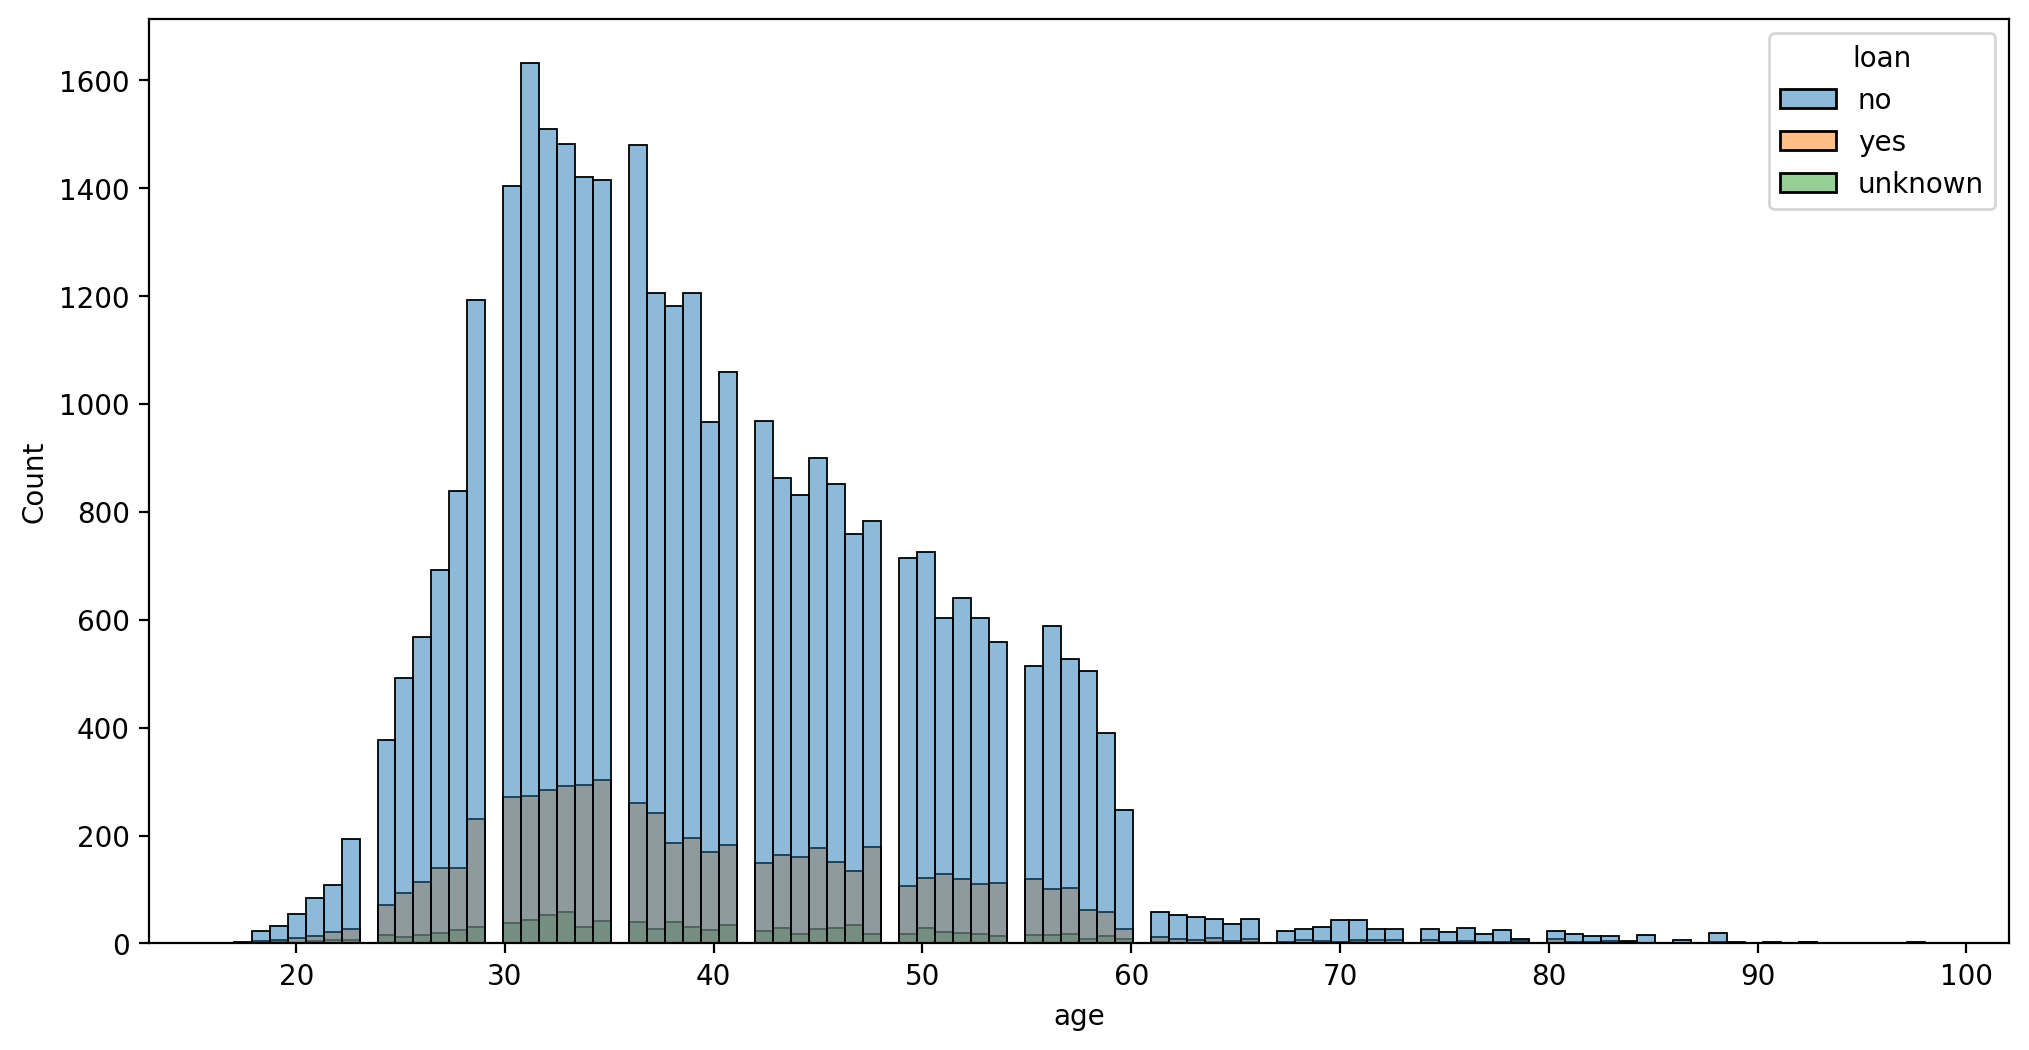

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

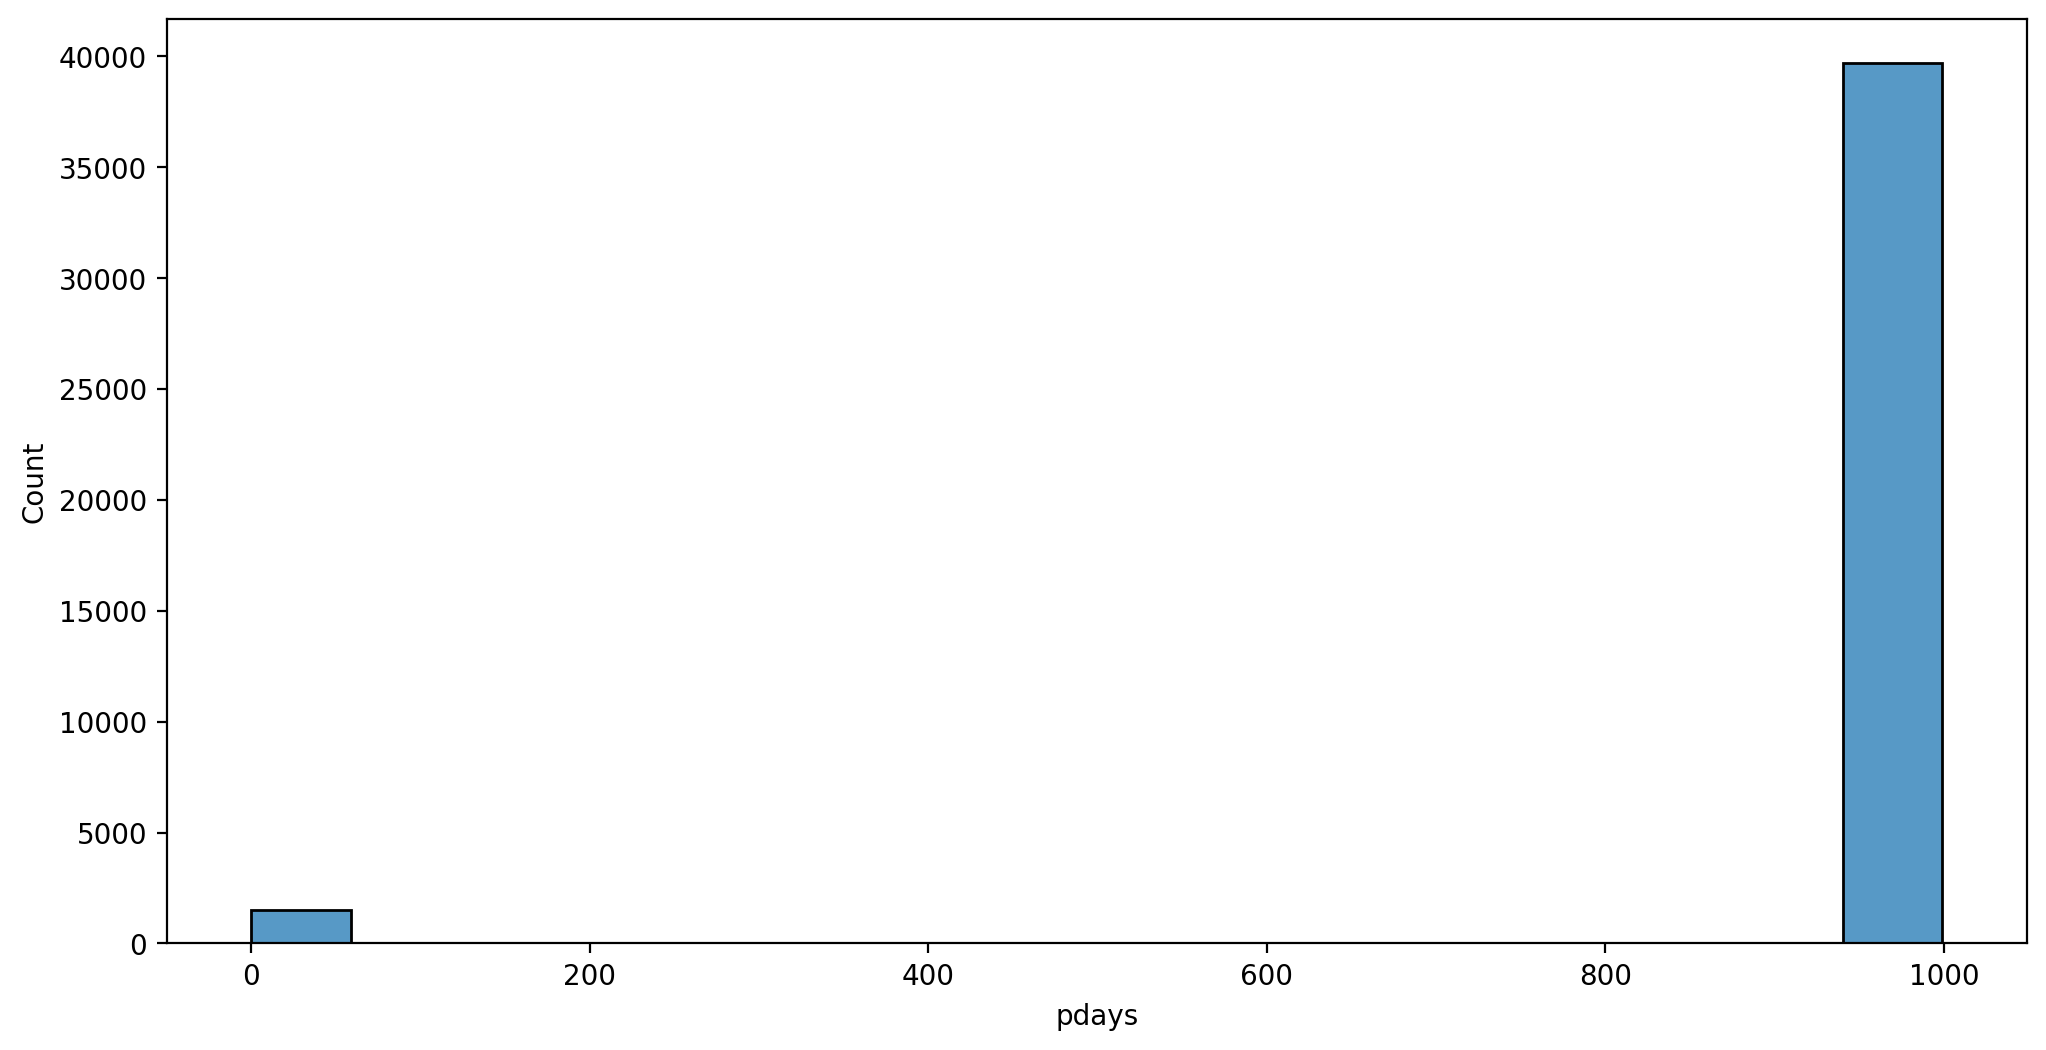

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

<Axes: xlabel='pdays', ylabel='Count'>

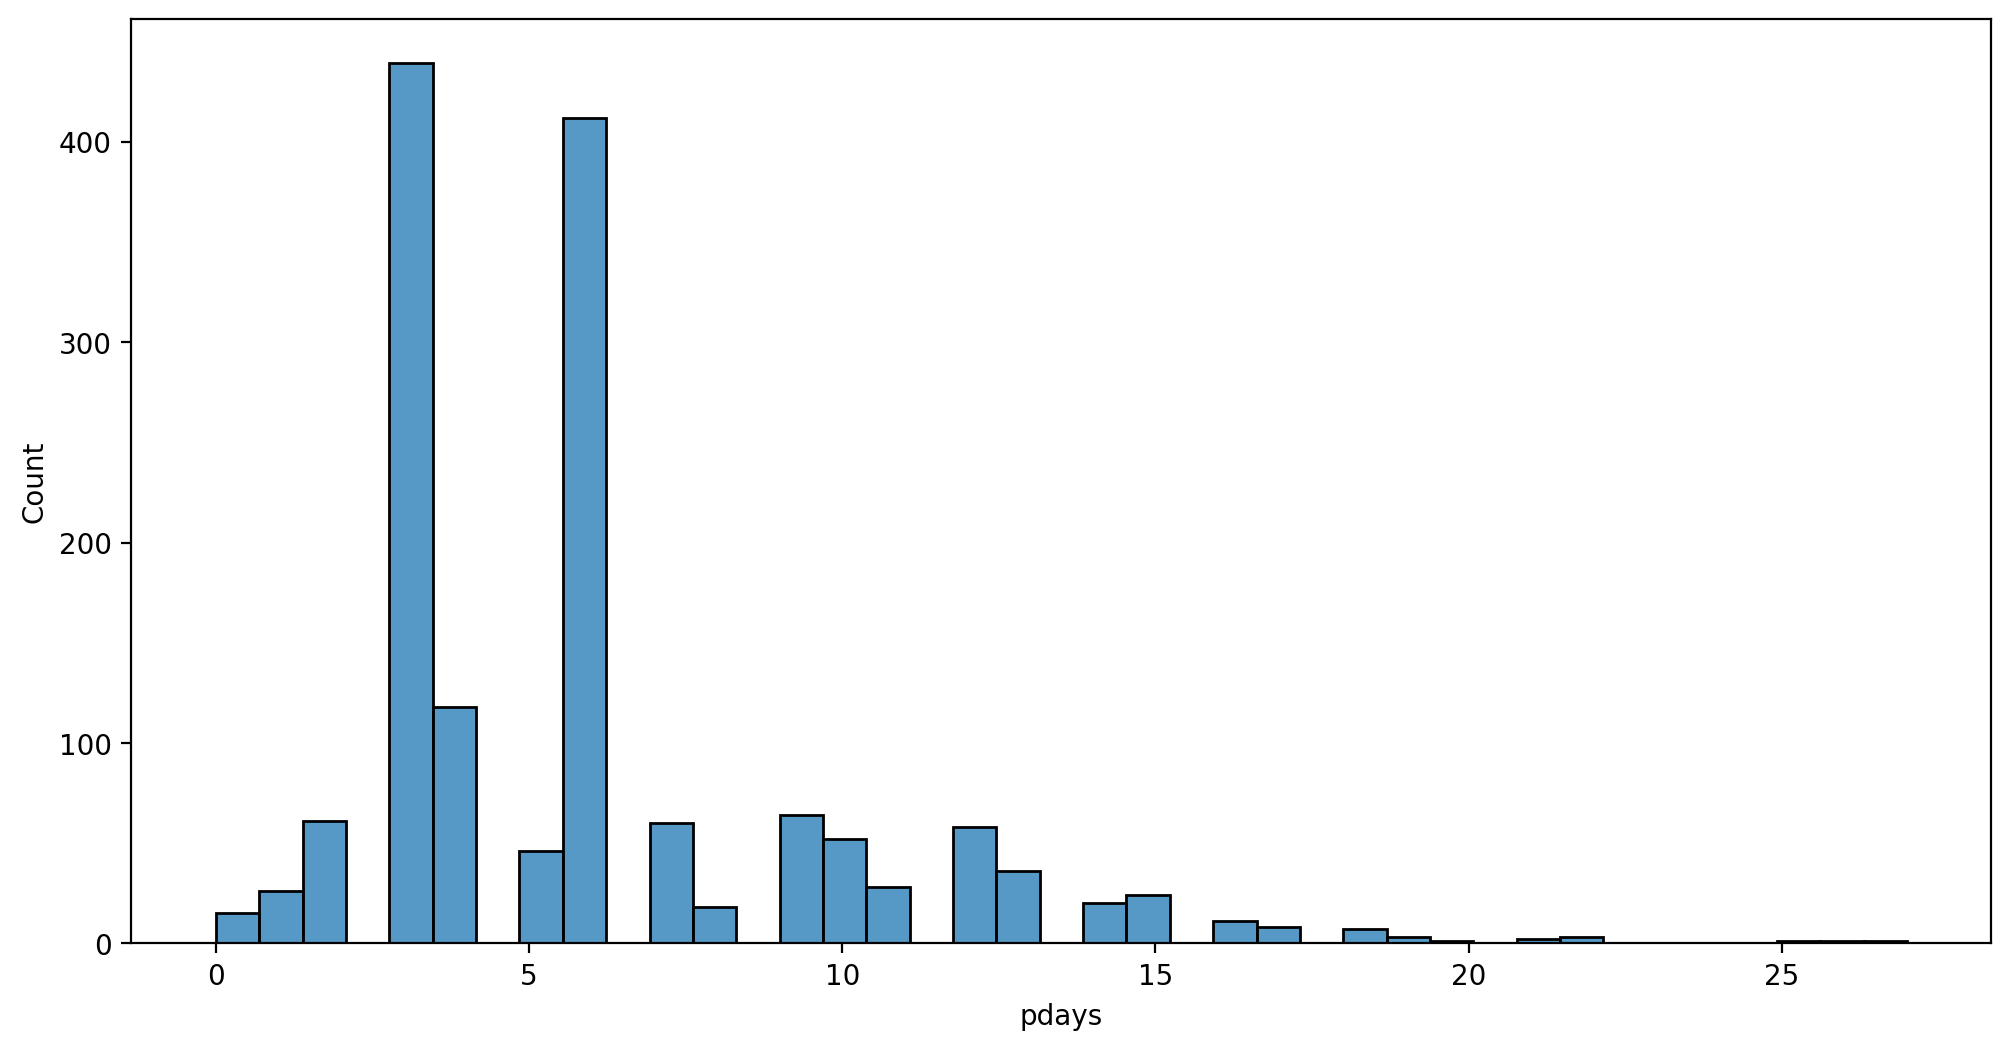

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

(0.0, 2000.0)

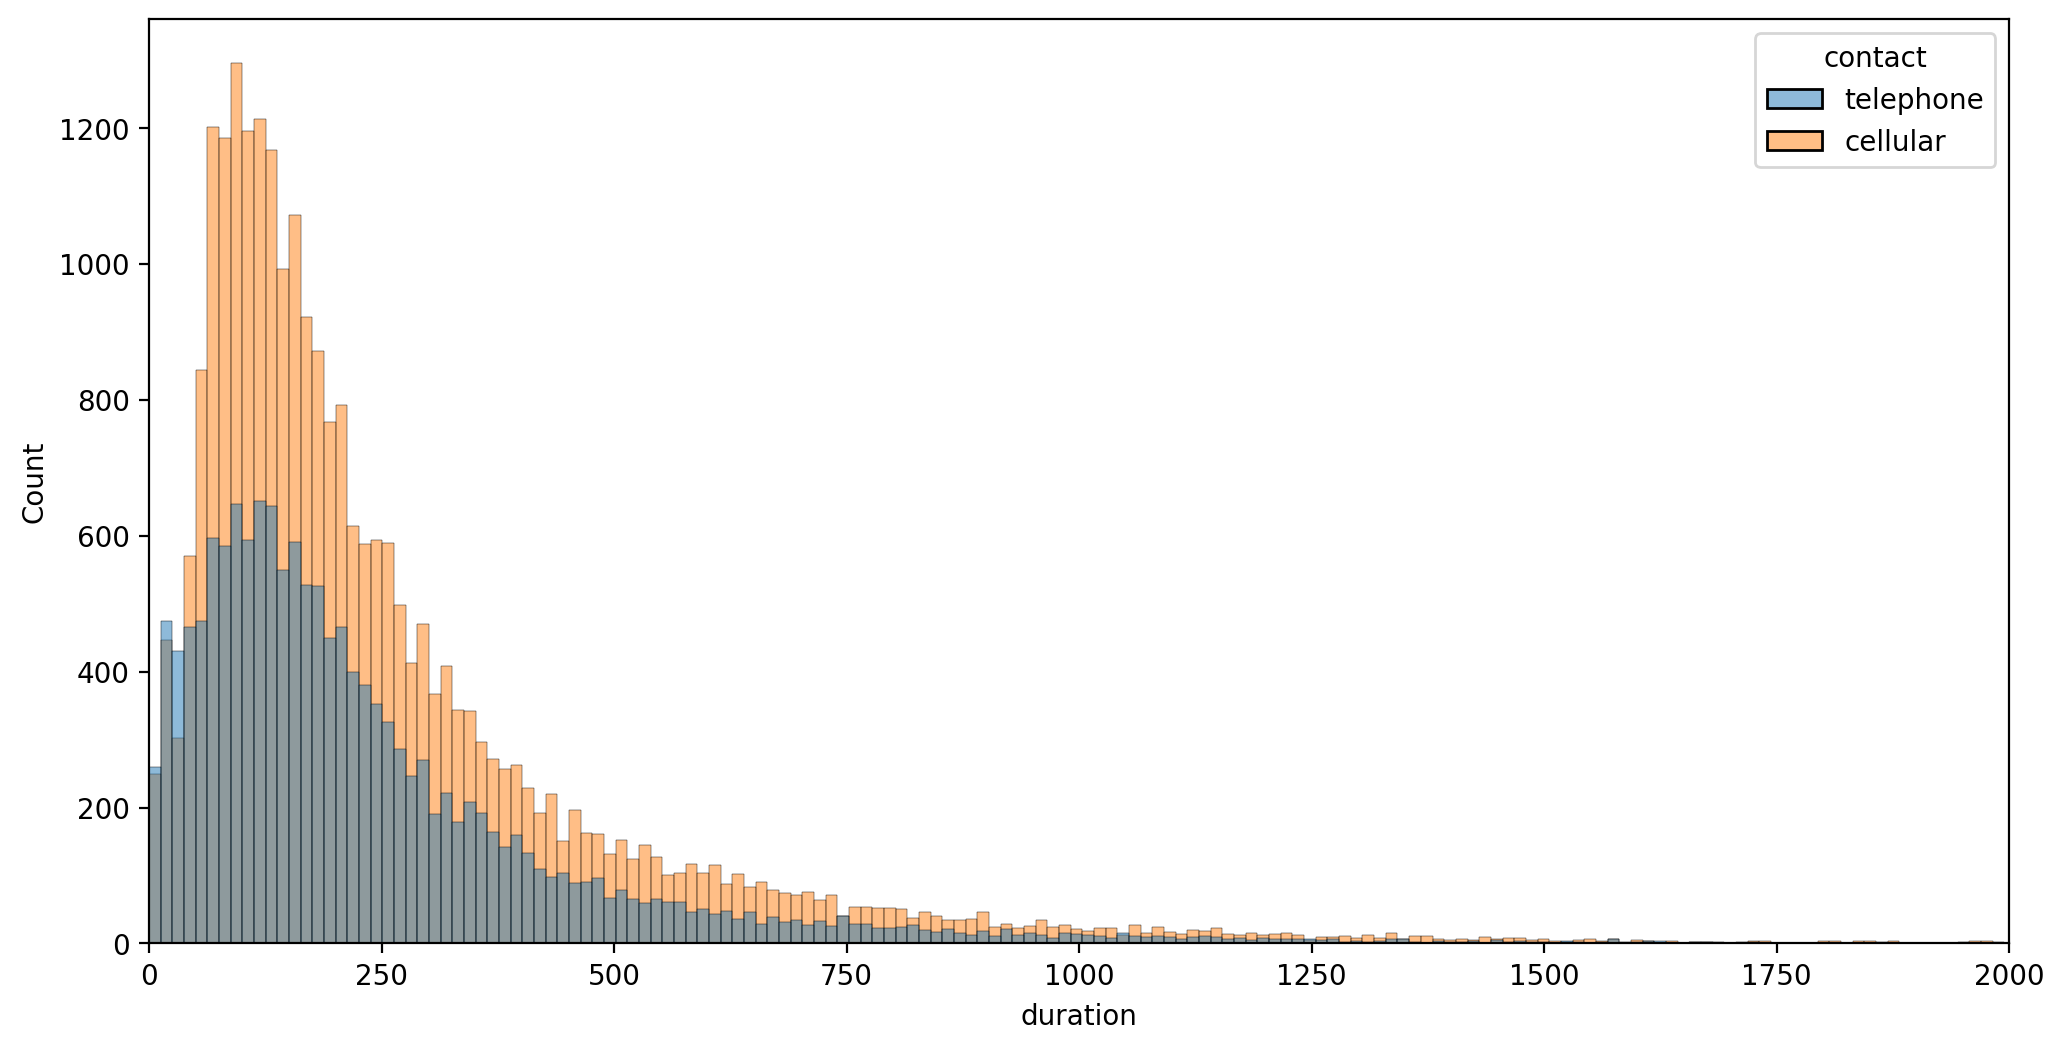

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

<Axes: xlabel='previous', ylabel='count'>

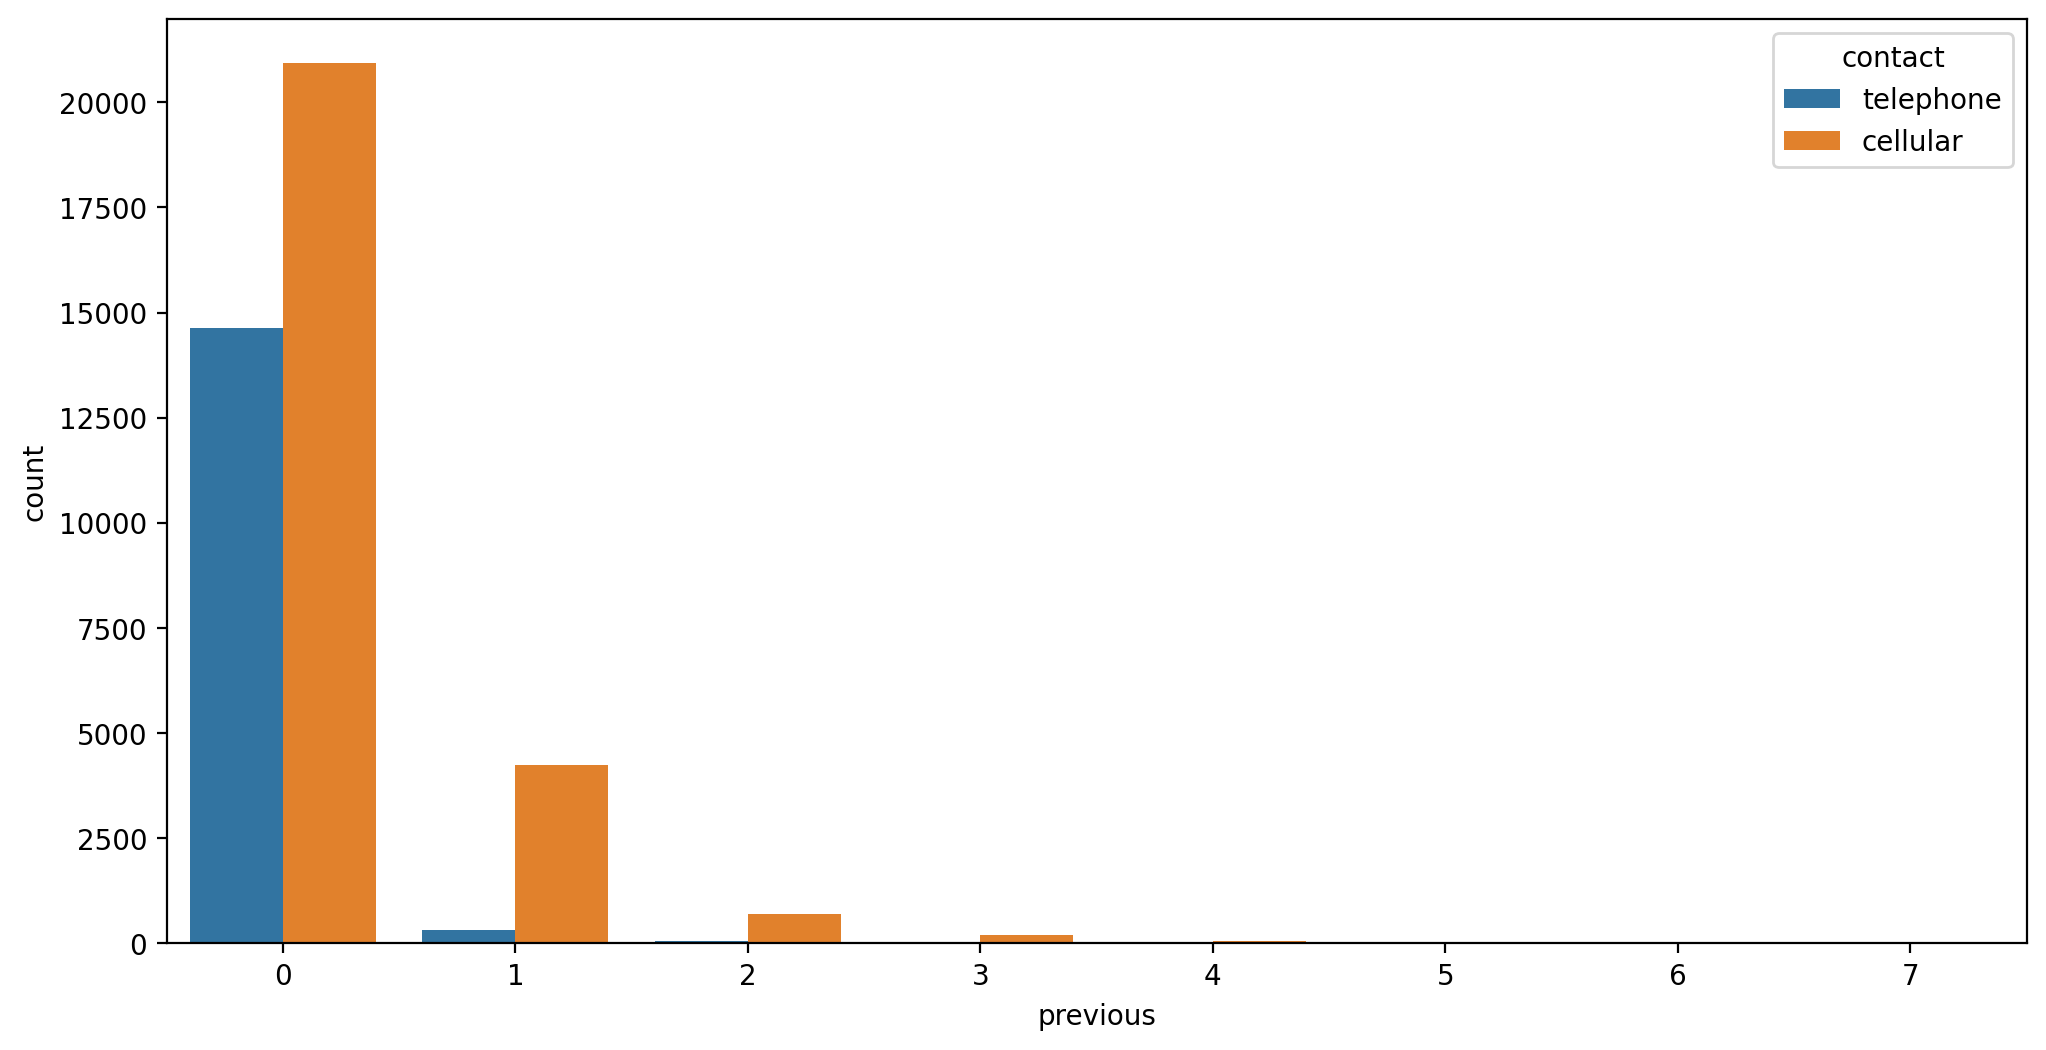

In [13]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

<Axes: xlabel='contact', ylabel='count'>

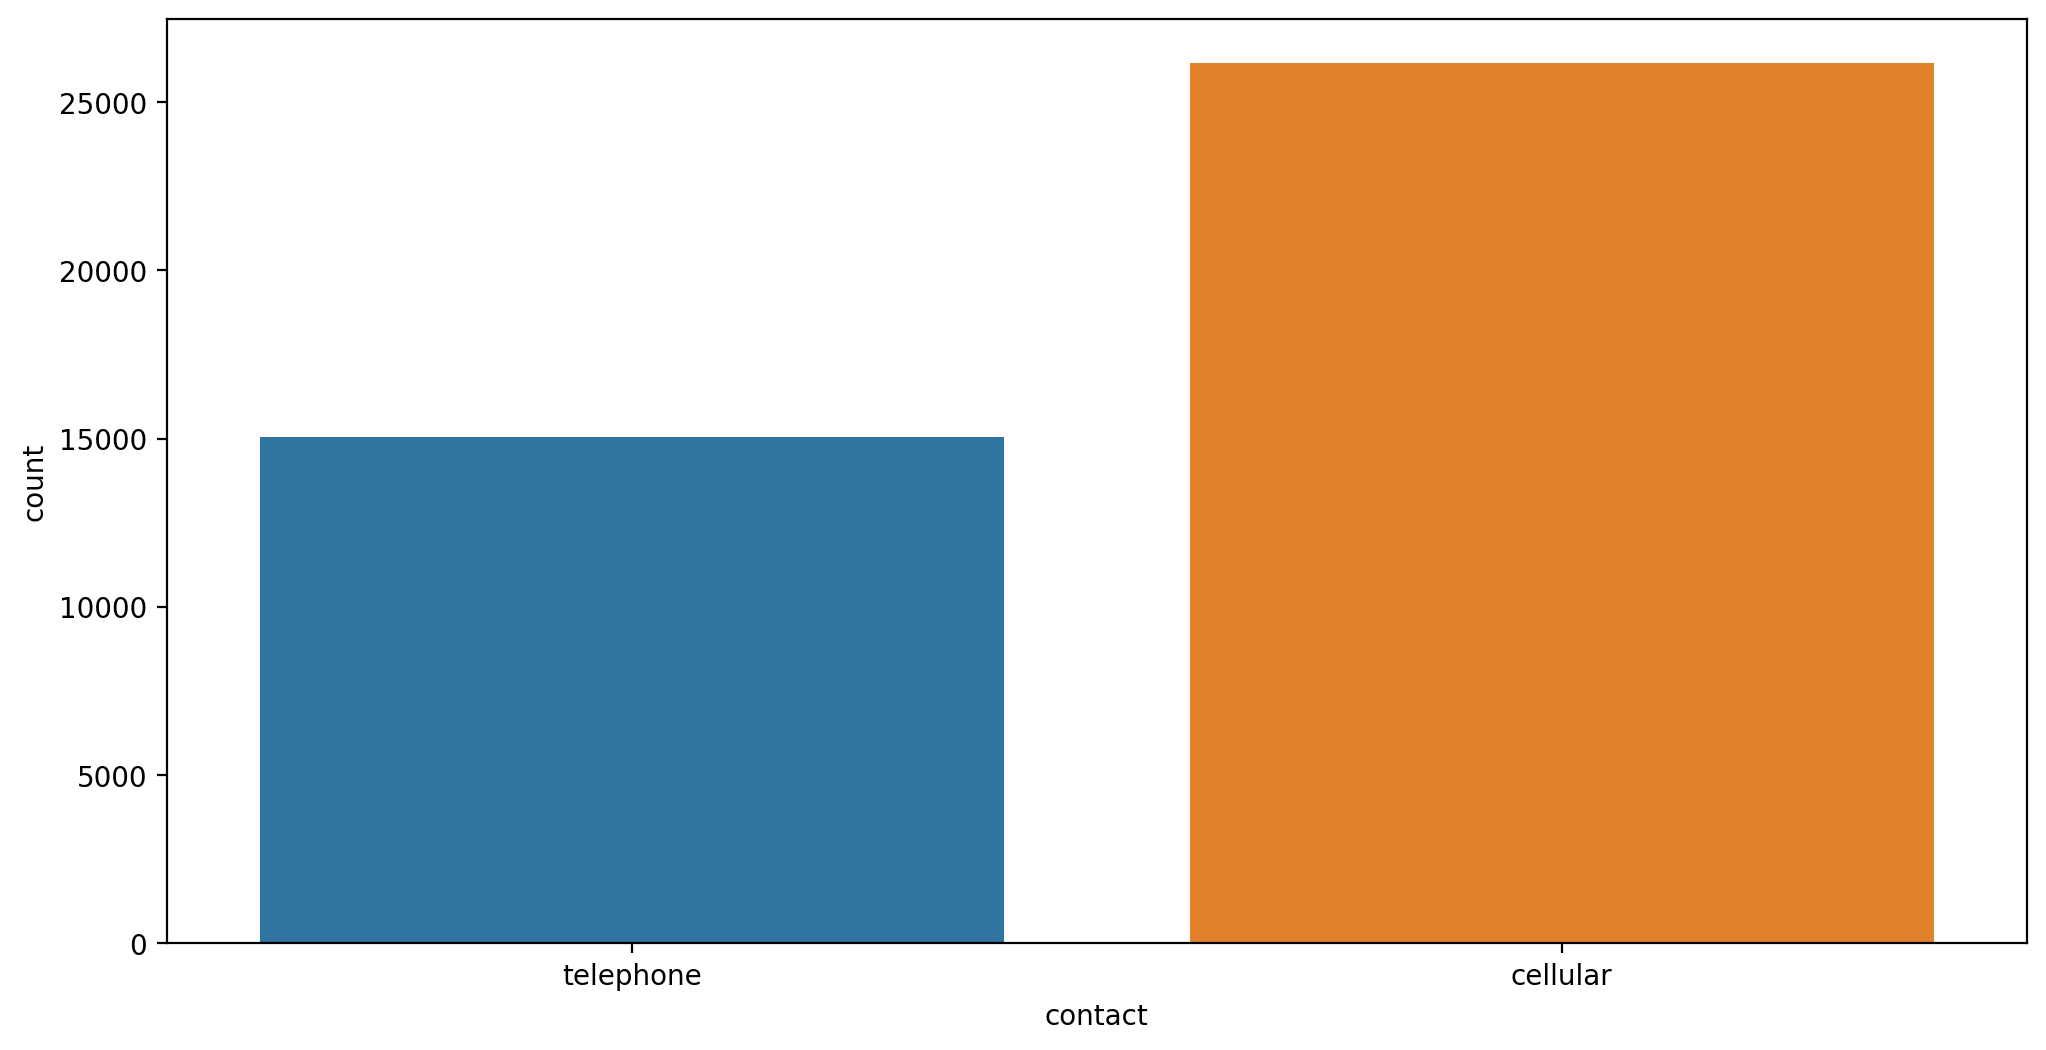

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='contact')

In [15]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

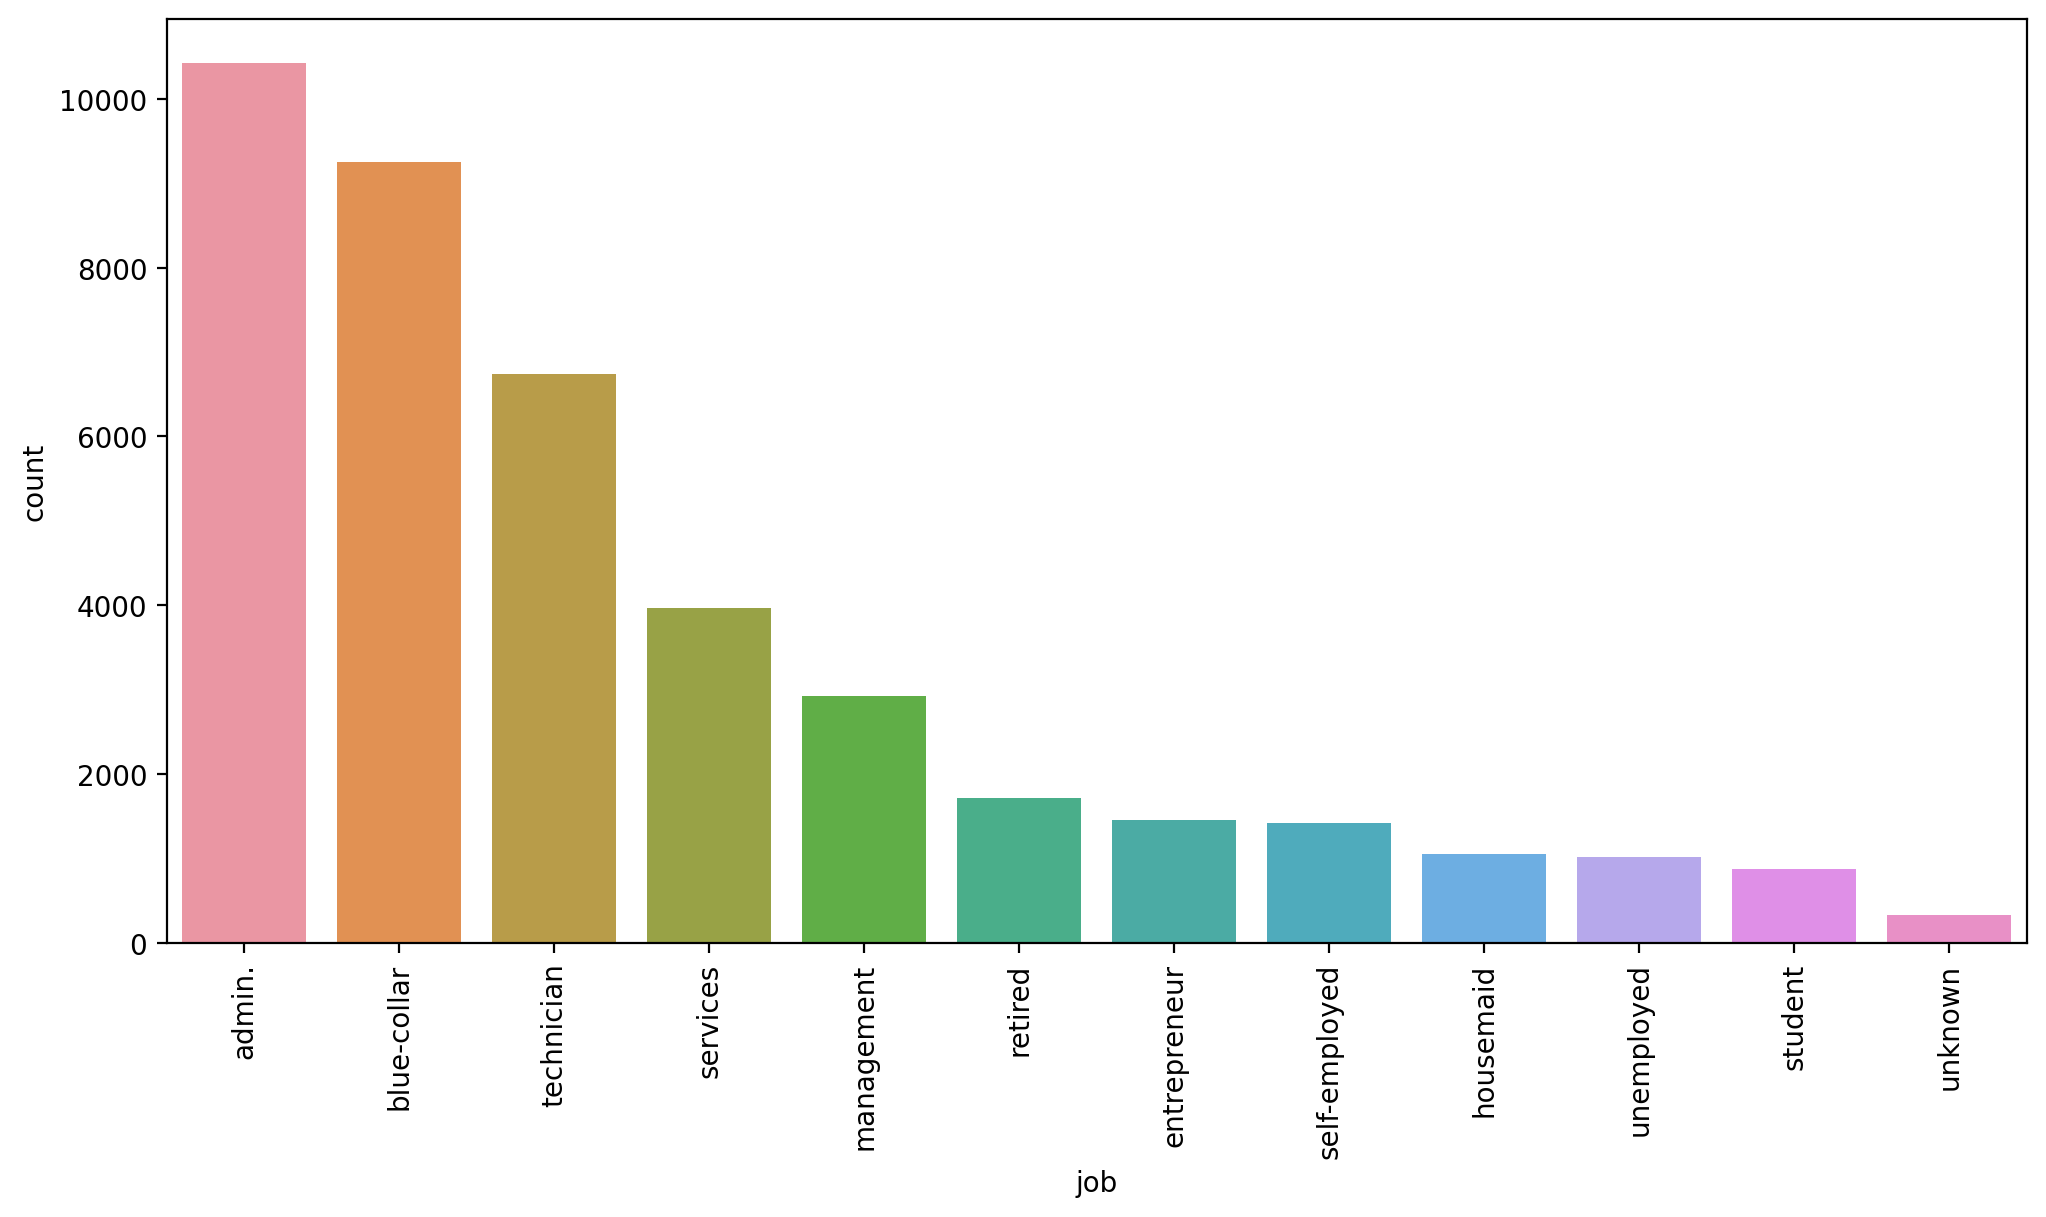

In [16]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'university.degree'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'professional.course'),
  Text(4, 0, 'basic.4y'),
  Text(5, 0, 'basic.6y'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'illiterate')])

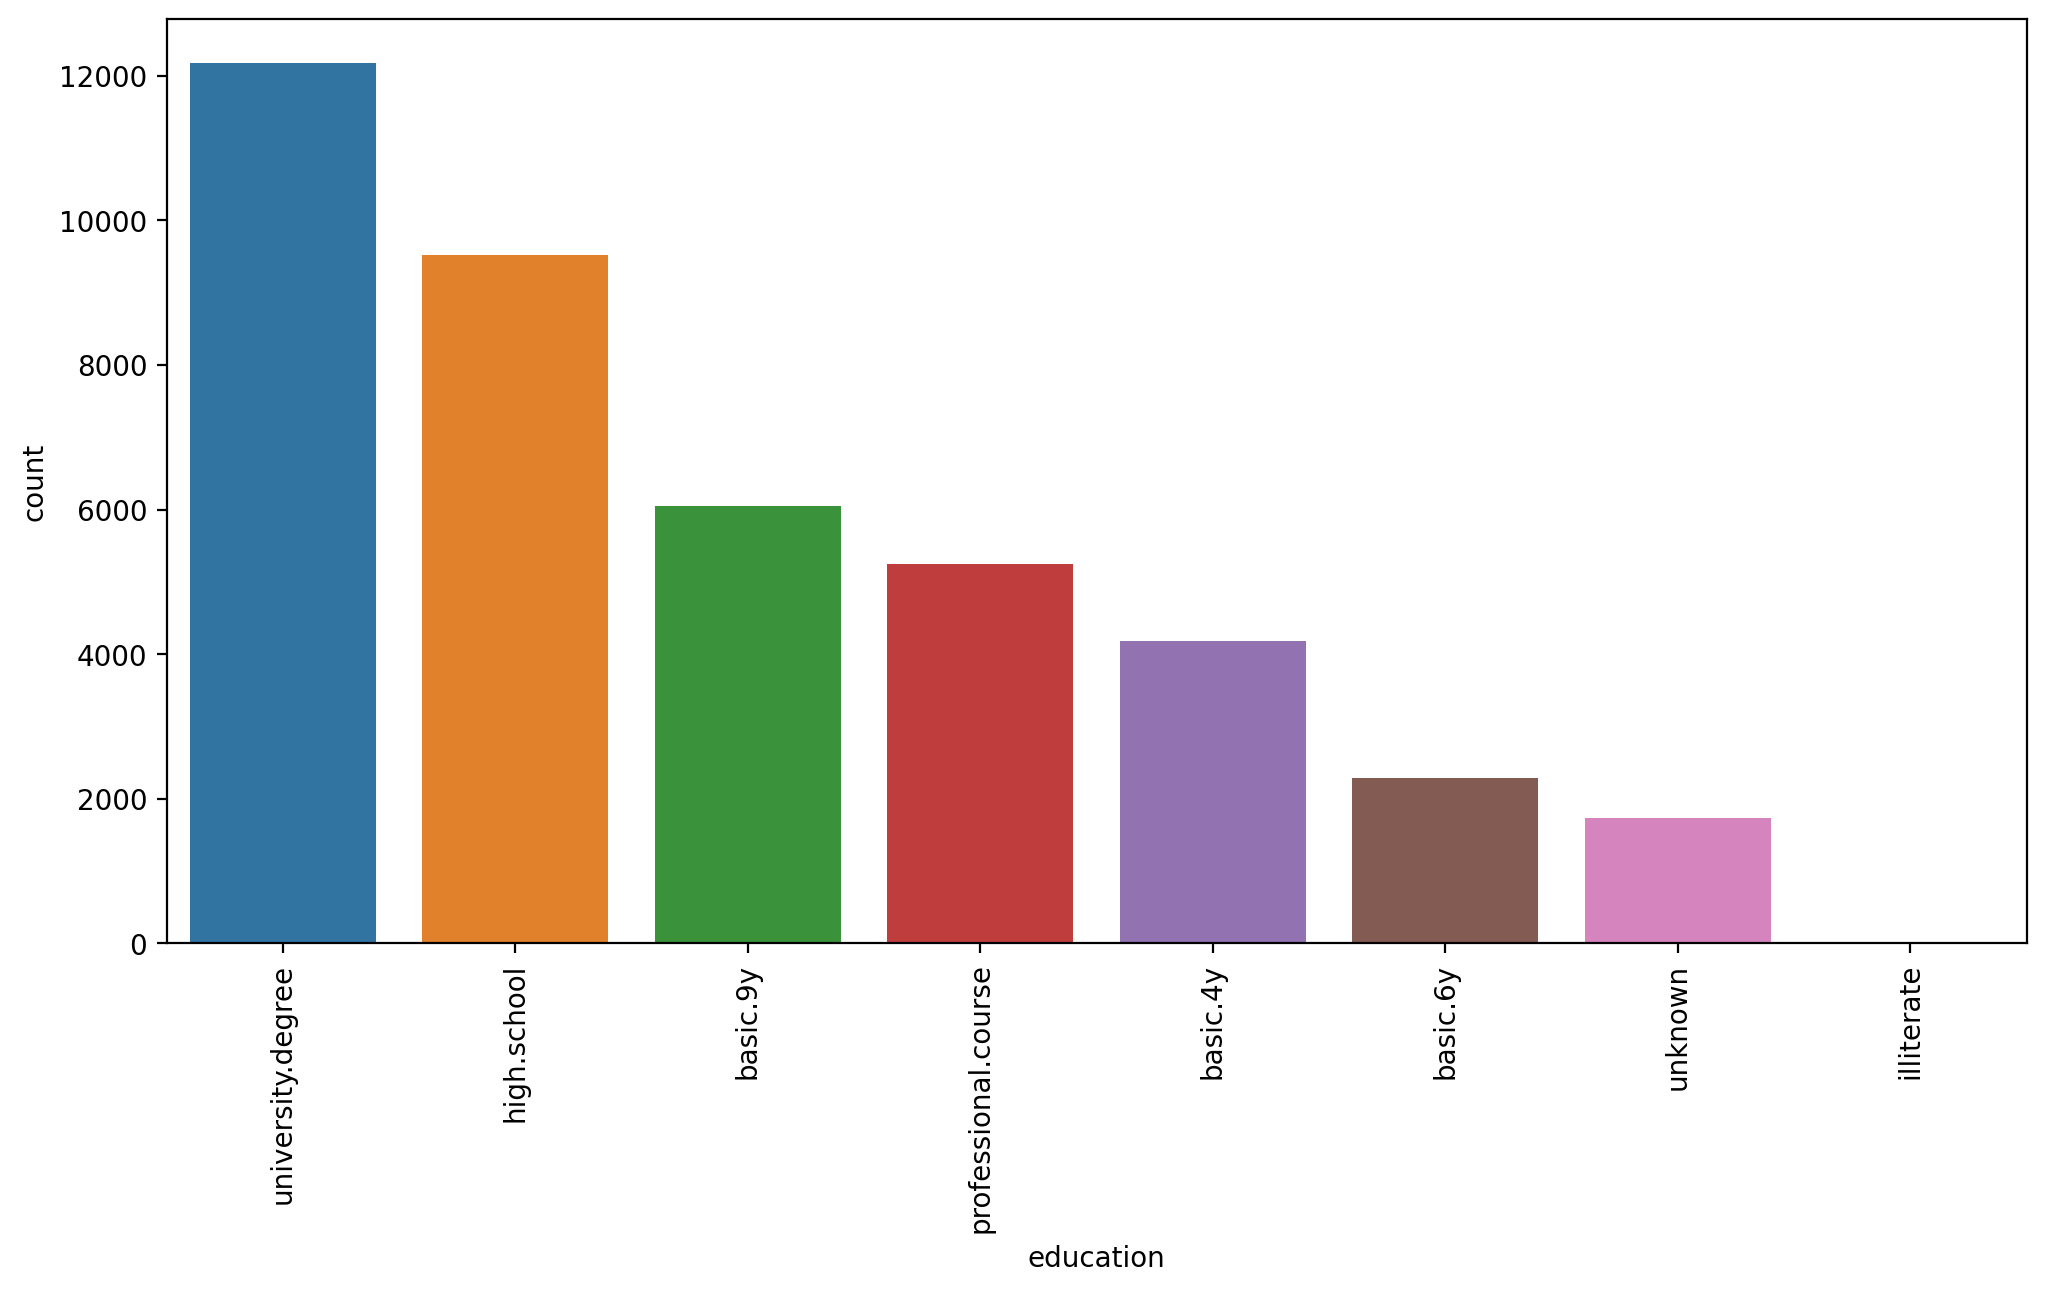

In [17]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'university.degree'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'professional.course'),
  Text(4, 0, 'basic.4y'),
  Text(5, 0, 'basic.6y'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'illiterate')])

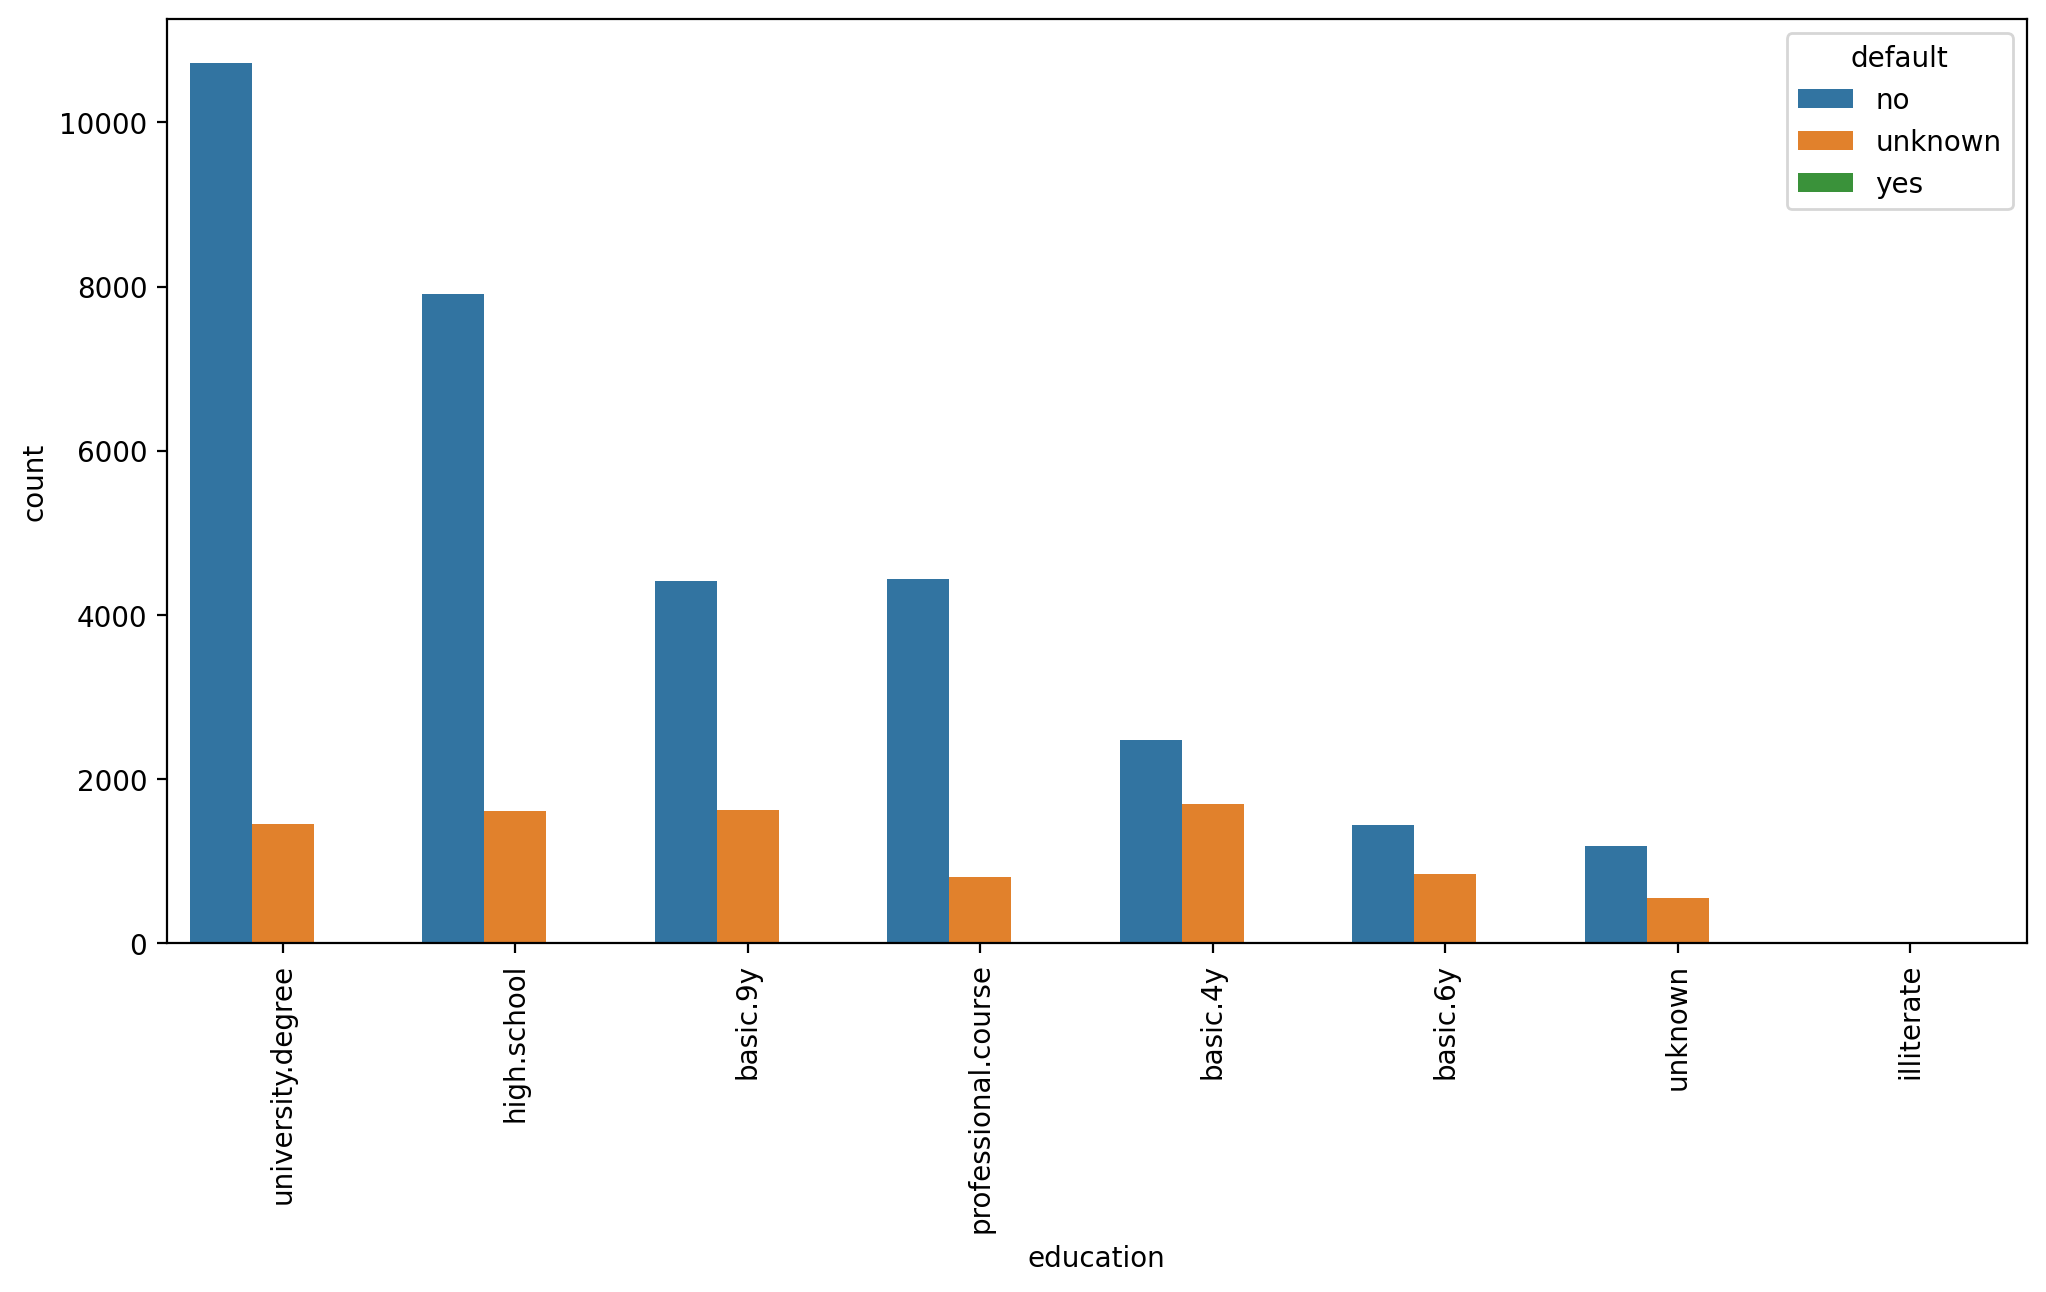

In [18]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90)

<Axes: xlabel='default', ylabel='count'>

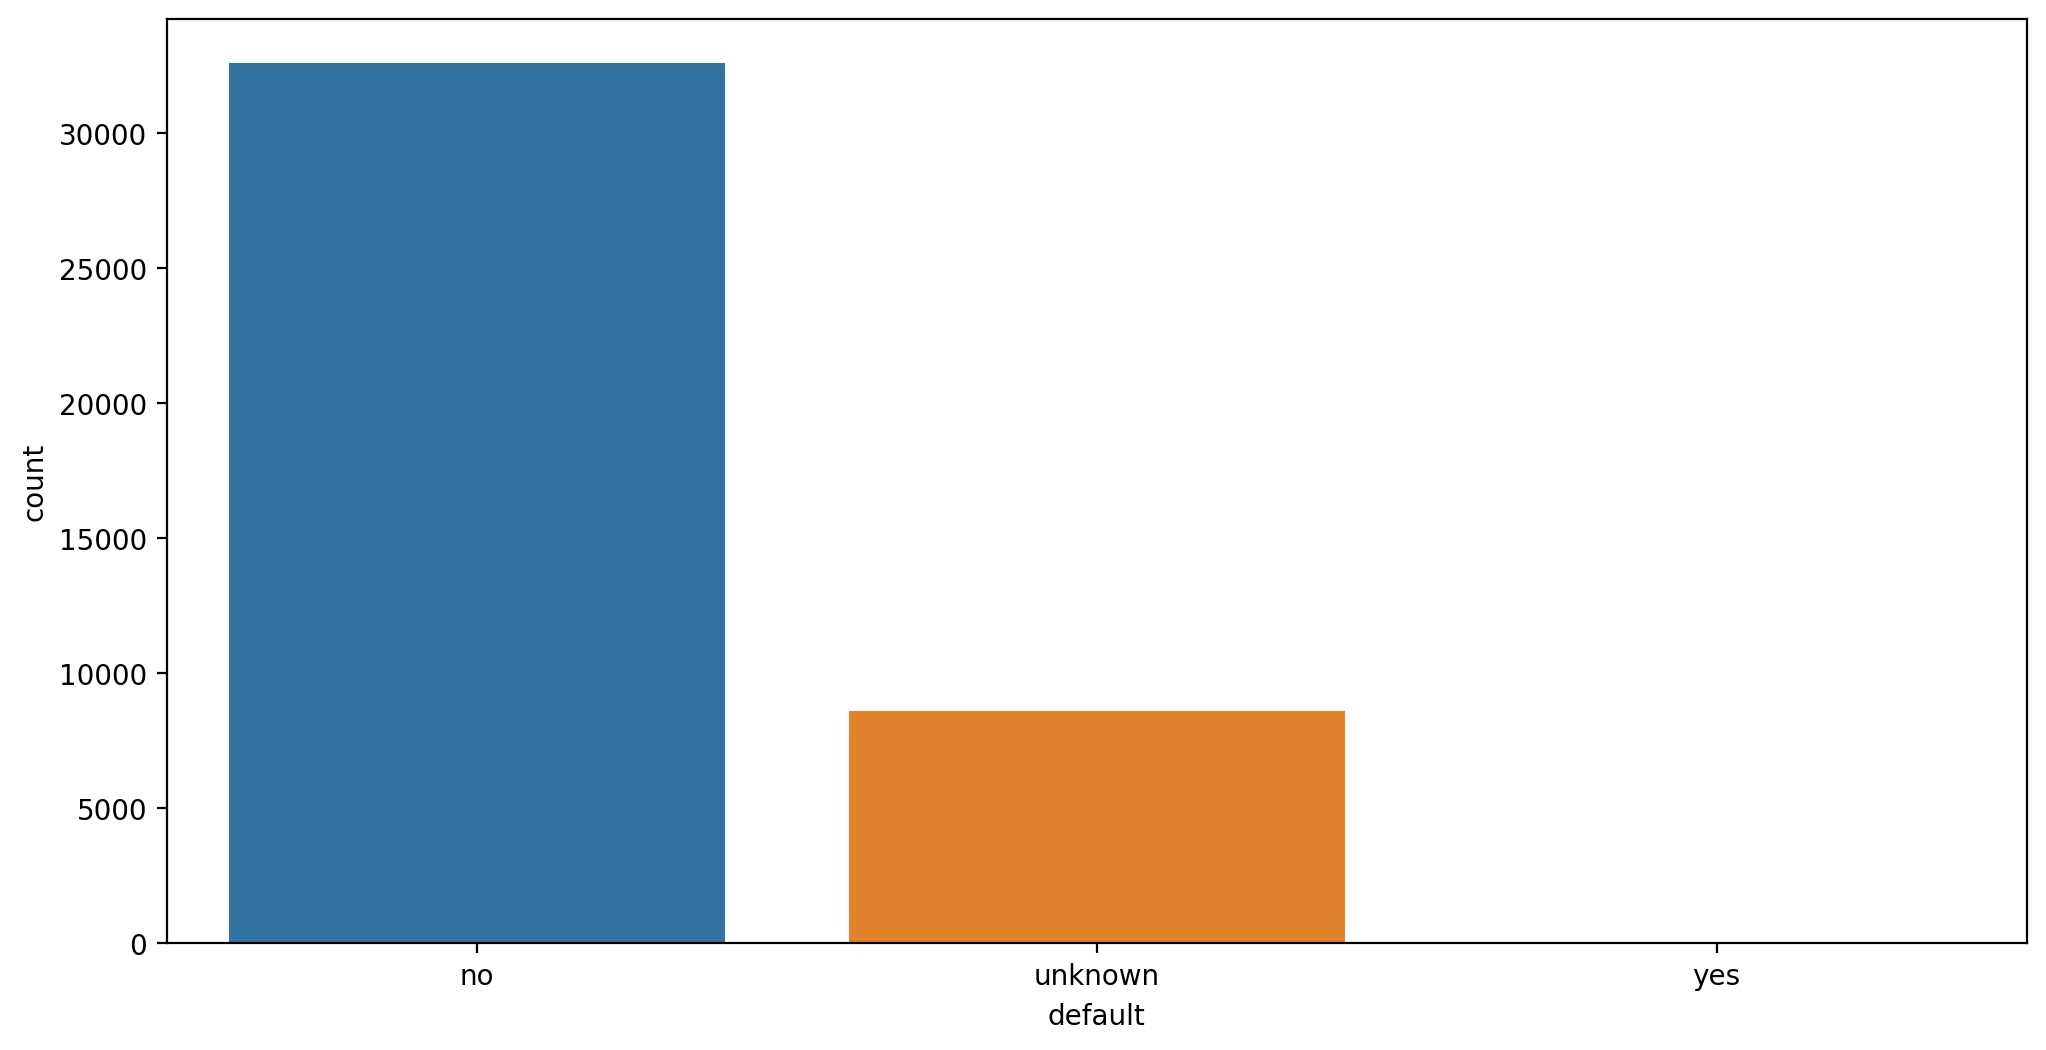

In [19]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='default')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x1200 with 0 Axes>

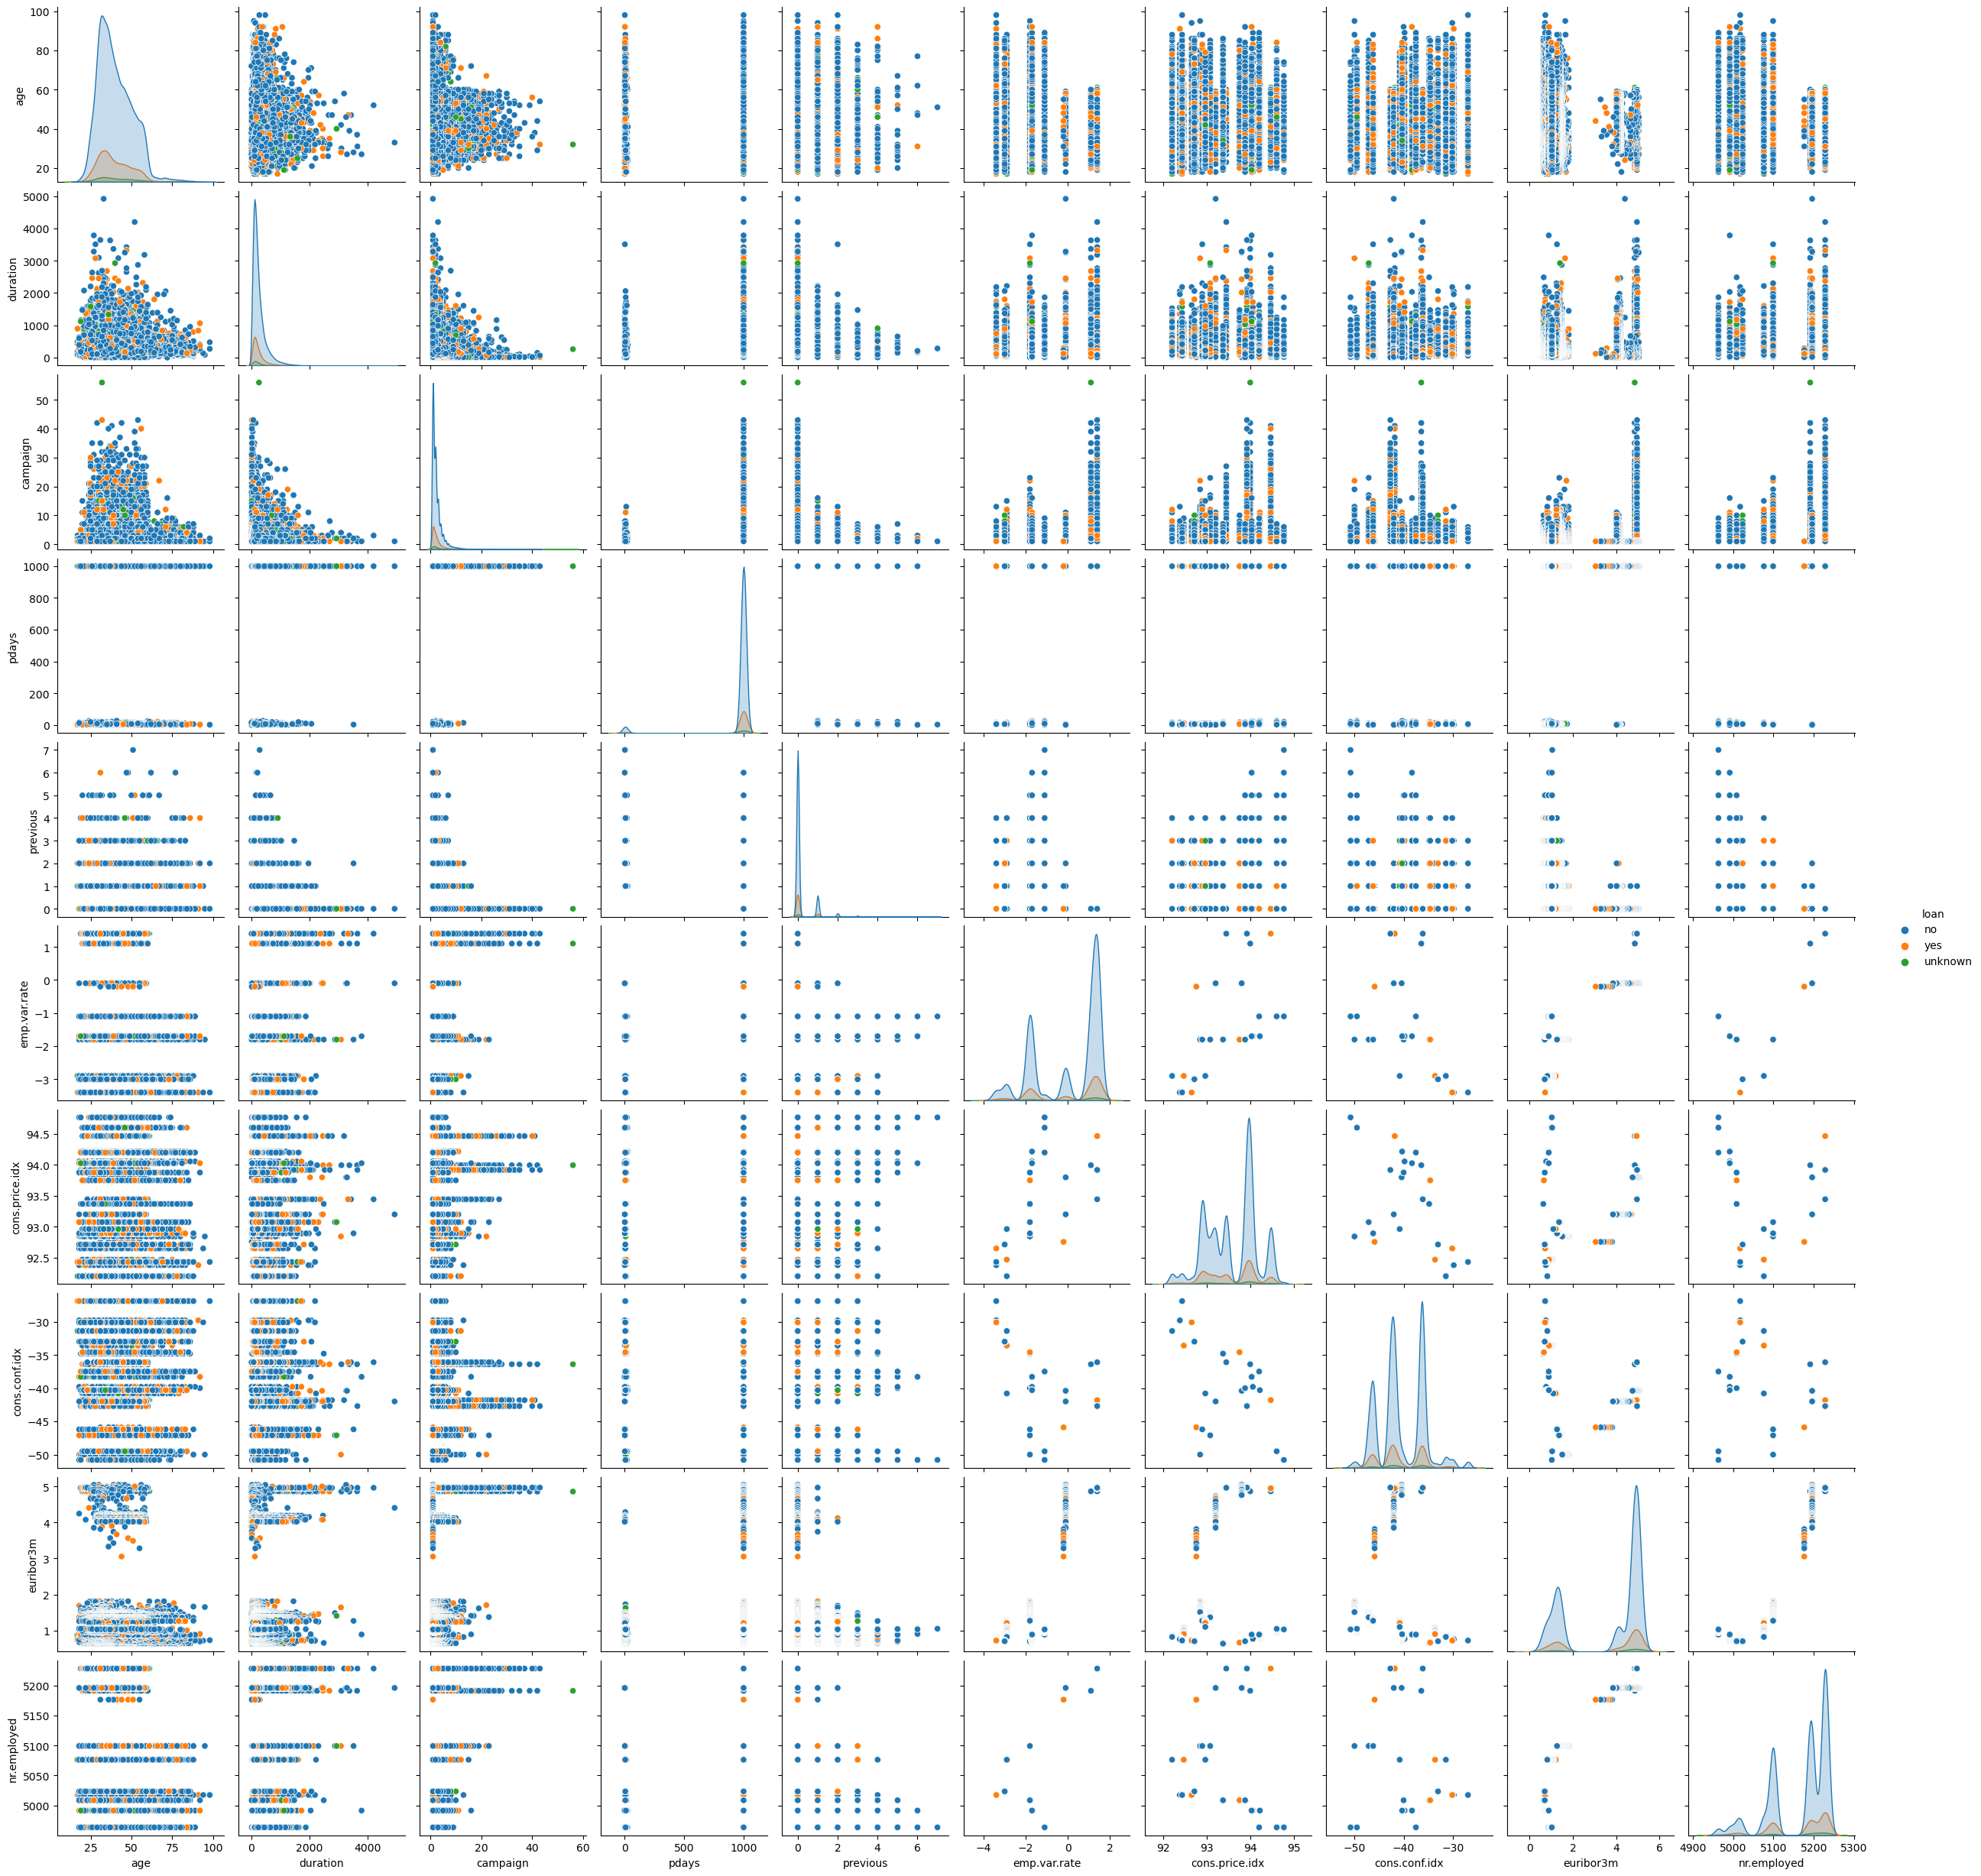

In [40]:
plt.figure(figsize=(12,6),dpi=200)
sns.pairplot(df, hue='loan')

In [21]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [22]:
pd.get_dummies(df)

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0              -36.4      4.857       5191.0  ...            False   
1              -36.4      4.857       5191.0  ...            False   
2              -36.4      4.857       5191.0  ...            False   
3              -36.4      4.857       5191.0  ...            False   
4              -36.4      4.857       5191.0  ...            False   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...             True   
41184          -50.8      1.028       4963.6  ...             True   
41185          -50.8      1.028       4963.6  ...             True   
41186          -50.8      1.028       4963.6  ...             True   
41187          -50.8      1.028       4963.6  ...             True   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                 True            False            False            False   
1                 True            False            False            False   
2                 True            False            False            False   
3                 True            False            False            False   
4                 True            False            False            False   
...                ...              ...              ...              ...   
41183            False            False            False            False   
41184            False            False            False            False   
41185            False            False            False            False   
41186            False            False            False            False   
41187            False            False            False            False   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                 False                  True             False   
1                 False                  True             False   
2                 False                  True             False   
3                 False                  True             False   
4                 False                  True             False   
...                 ...                   ...               ...   
41183             False                  True             False   
41184             False                  True             False   
41185             False                  True             False   
41186             False                  True             False   
41187              True                 False             False   

       subscribed_no  subscribed_yes  
0               True           False  
1               True           False  
2               True           False  
3               True           False  
4               True           False  
...              ...             ...  
41183          False            True  
41184           True           False  
41185           True           False  
41186          False            True  
41187           True           Fal

## data preparation

In [69]:
scaler = StandardScaler()
X = pd.get_dummies(df)
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.698638   1.483947      1.077290    0.664133  0.620540     -1.285258   
1   -1.083498   1.483947      1.488732    1.574594  0.843334     -1.466724   
2   -0.698638   1.483947      1.182542    1.184397  0.540382     -1.648189   
3   -0.955212   1.483947      1.048584    1.184397  0.536845     -1.285258   
4   -0.826925   1.483947      1.029447    0.924265  0.555706     -1.829655   
..        ...        ...           ...         ...       ...           ...   
387  0.455941  -0.864014     -0.520637   -0.480448 -0.221125      0.021294   
388  2.636813  -0.864014     -0.932079   -1.364896 -0.999134      3.287676   
389  1.097374  -0.864014     -0.568479   -0.532474 -0.804632     -1.430430   
390  0.584228  -0.864014     -0.712005   -0.662540 -0.415627      1.110088   
391  0.969088  -0.864014     -0.721574   -0.584501 -0.303641      1.400433   

     model_year  origin_europe  origin_japan  origin_usa  ...  \
0     -1.625315      -0.458123      -0.50239    0.774597  ...   
1     -1.625315      -0.458123      -0.50239    0.774597  ...   
2     -1.625315      -0.458123      -0.50239    0.774597  ...   
3     -1.625315      -0.458123      -0.50239    0.774597  ...   
4     -1.625315      -0.458123      -0.50239    0.774597  ...   
..          ...            ...           ...         ...  ...   
387    1.636410      -0.458123      -0.50239    0.774597  ...   
388    1.636410       2.182821      -0.50239   -1.290994  ...   
389    1.636410      -0.458123      -0.50239    0.774597  ...   
390    1.636410      -0.458123      -0.50239    0.774597  ...   
391    1.636410      -0.458123      -0.50239    0.774597  ...   

     name_volvo 145e (sw)  name_volvo 244dl  name_volvo 245  name_volvo 264gl  \
0               -0.050572         -0.050572       -0.050572         -0.050572   
1               -0.050572         -0.050572       -0.050572         -0.050572   
2               -0.050572         -0.050572       -0.050572         -0.050572   
3               -0.050572         -0.050572       -0.050572         -0.050572   
4               -0.050572         -0.050572       -0.050572         -0.050572   
..                    ...               ...             ...               ...   
387             -0.050572         -0.050572       -0.050572         -0.050572   
388             -0.050572         -0.050572       -0.050572         -0.050572   
389             -0.050572         -0.050572       -0.050572         -0.050572   
390             -0.050572         -0.050572       -0.050572         -0.050572   
391             -0.050572         -0.050572       -0.050572         -0.050572   

     name_volvo diesel  name_vw dasher (diesel)  name_vw pickup  \
0            -0.050572                -0.050572       -0.050572   
1            -0.050572                -0.050572       -0.050572   
2            -0.050572                -0.050572       -0.050572   
3            -0.050572                -0.050572       -0.050572   
4            -0.050572                -0.050572       -0.050572   
..                 ...                      ...             ...   
387          -0.050572                -0.050572       -0.050572   
388          -0.050572                -0.050572       19.773720   
389          -0.050572                -0.050572       -0.050572   
390          -0.050572                -0.050572       -0.050572   
391          -0.050572                -0.050572       -0.050572   

     name_vw rabbit  name_vw rabbit c (diesel)  name_vw rabbit custom  
0         -0.071611                  -0.050572              -0.050572  
1         -0.071611                  -0.050572              -0.050572  
2         -0.071611                  -0.050572              -0.050572  
3         -0.071611                  -0.050572              -0.050572  
4         -0.071611                  -0.050572              -0.050572  
..              ...                        ...                    ...  
387       

# K-Means

In [24]:
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(X_scaled)
print('cluster_labels: ', cluster_labels)
print('len(scaled_X): ', len(X_scaled))
print('len(cluster_labels): ', len(cluster_labels))
X['Cluster'] = cluster_labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster_labels:  [1 1 1 ... 0 0 0]
len(scaled_X):  41188
len(cluster_labels):  41188


In [25]:
X['Cluster'].unique()

array([1, 0])

<Axes: >

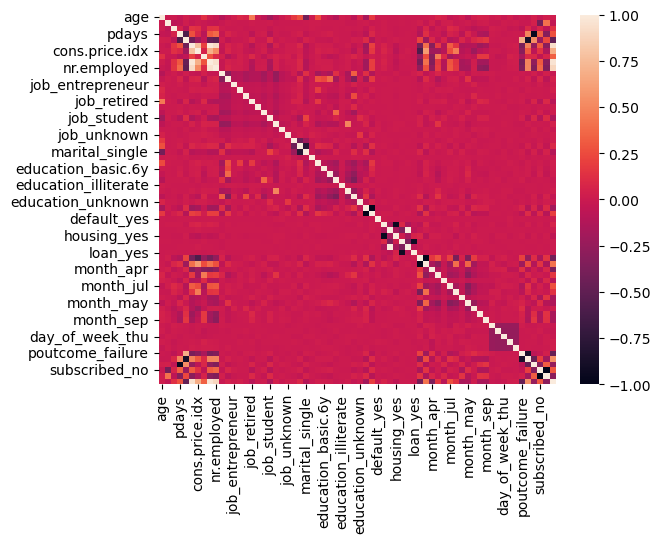

In [26]:
sns.heatmap(X.corr())

In [27]:
X.corr()['Cluster'].sort_values()

previous           -0.478467
poutcome_failure   -0.464295
contact_cellular   -0.410476
month_apr          -0.357923
subscribed_yes     -0.294610
                      ...   
cons.price.idx      0.679372
nr.employed         0.886155
emp.var.rate        0.932612
euribor3m           0.959297
Cluster             1.000000
Name: Cluster, Length: 66, dtype: float64

<Axes: >

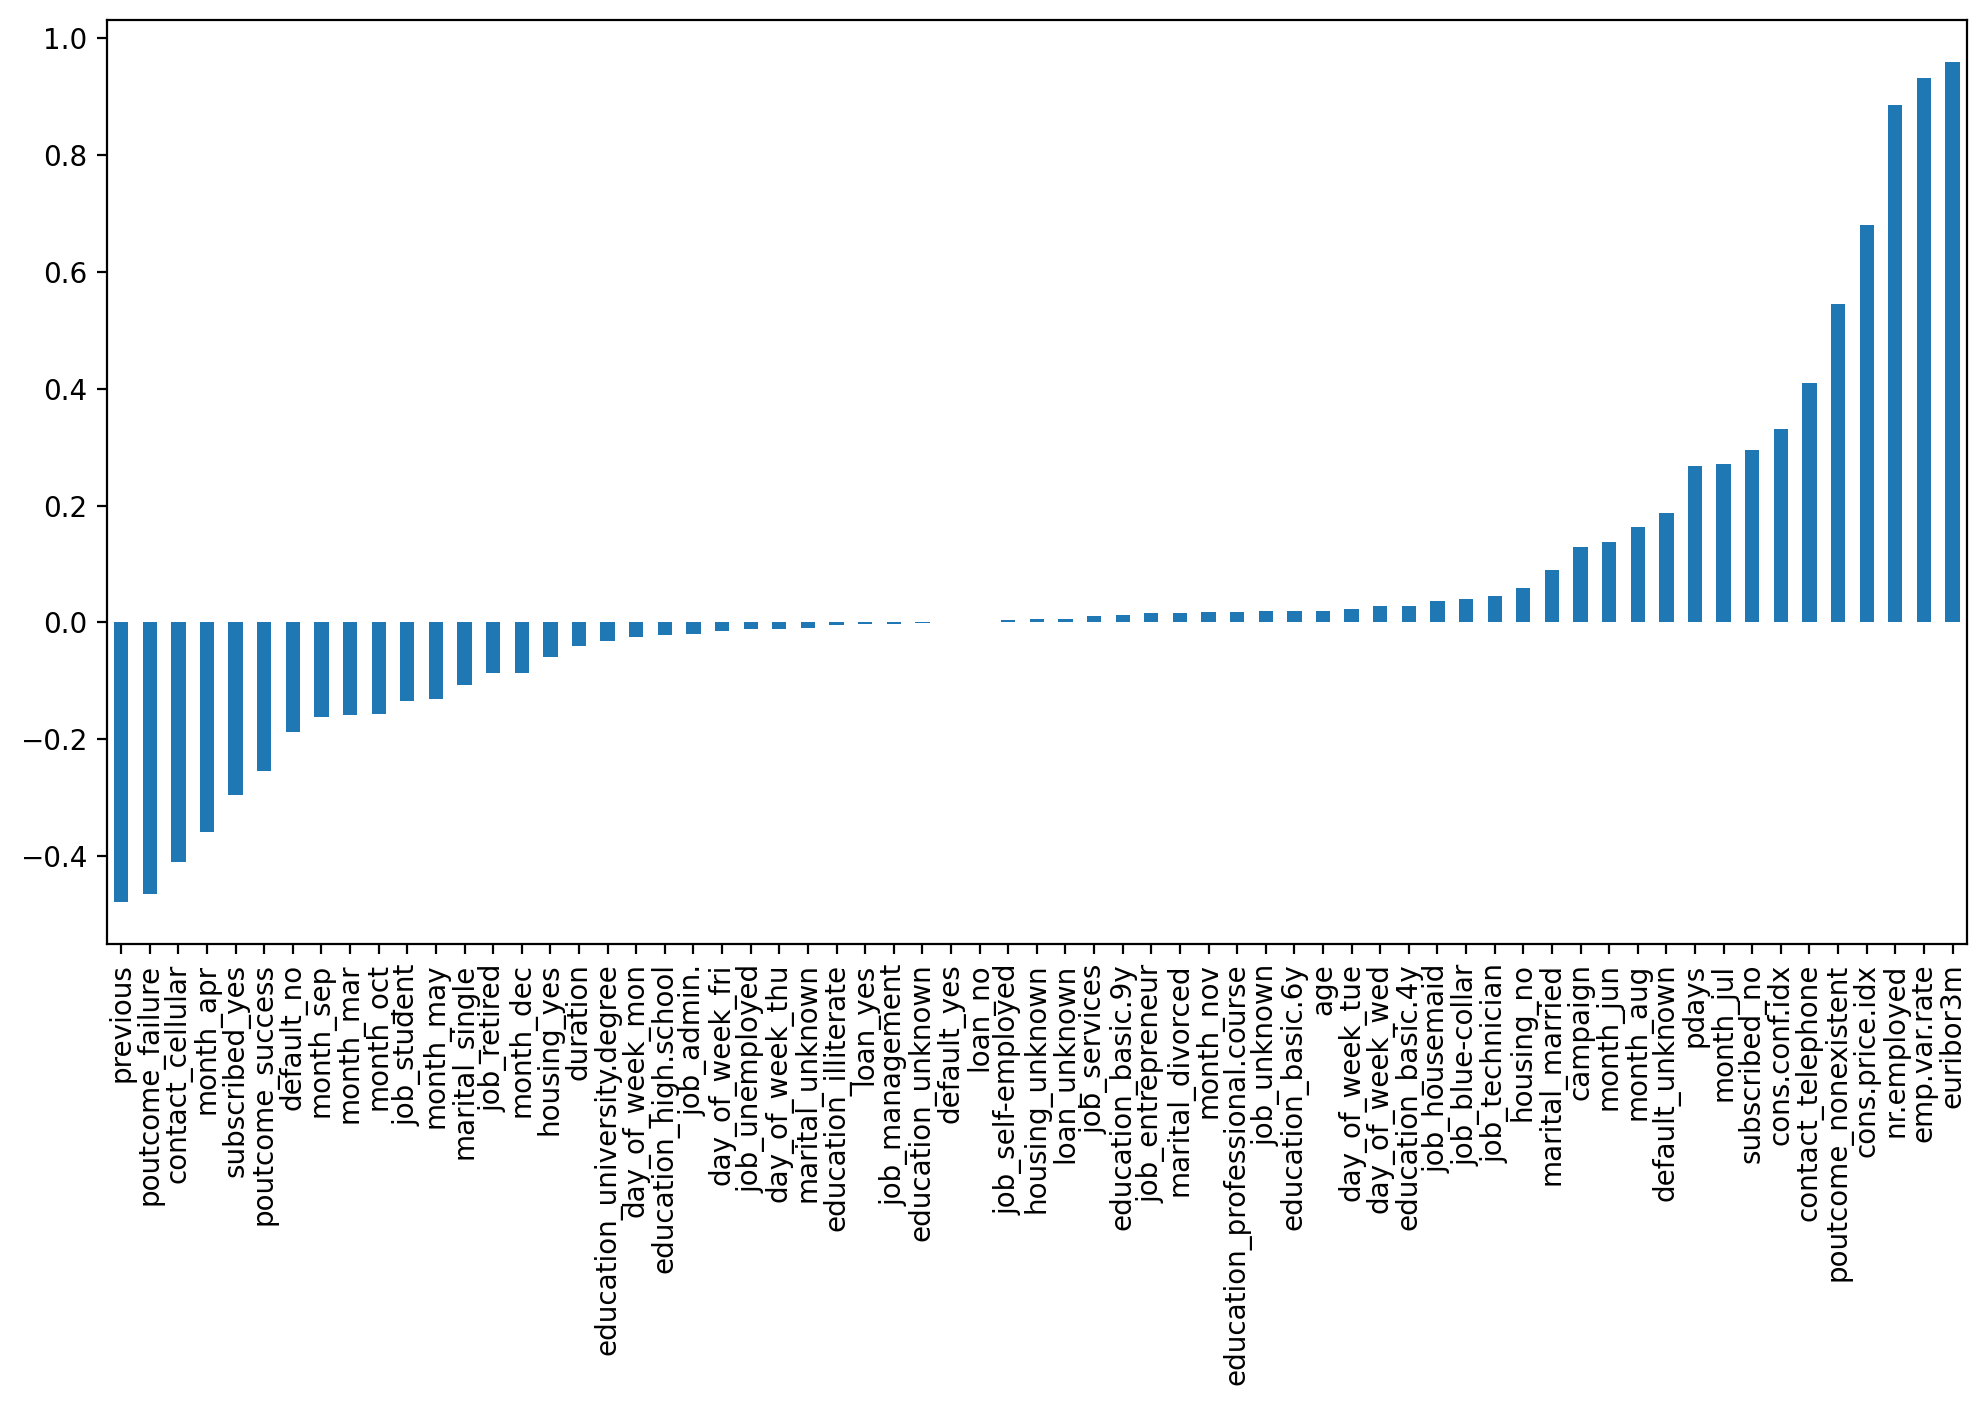

In [28]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [29]:
# Choosing K Value
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [30]:
ssd

[2469792.361662749,
 2370416.6196592874,
 2271502.9140613778,
 2204983.4297321653,
 2157695.0548947994,
 2113325.2507567317,
 2029347.70477365,
 1989182.8515296178]

Text(0, 0.5, 'Sum of Squared Distances')

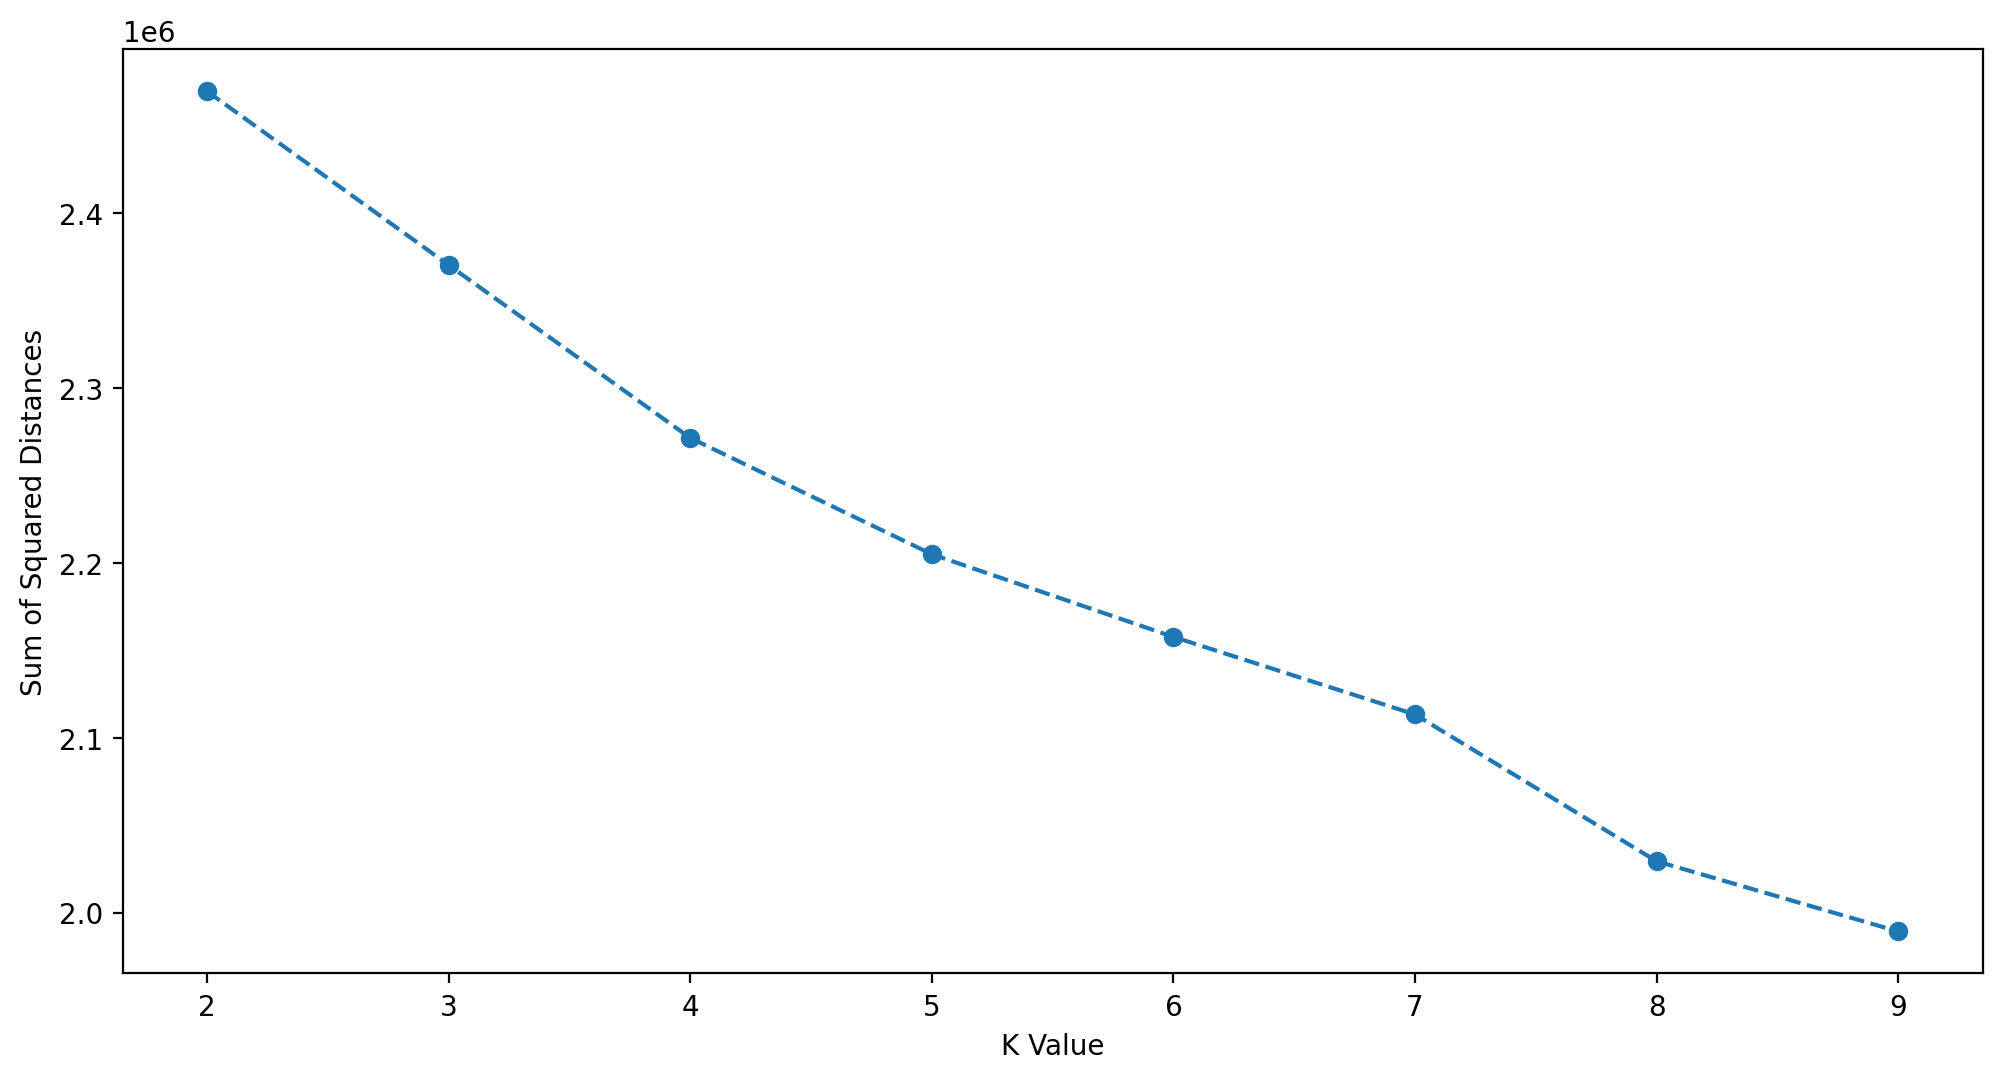

In [31]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

<Axes: >

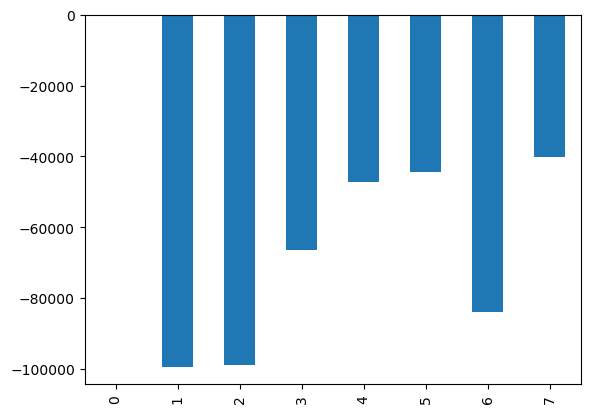

In [32]:
pd.Series(ssd).diff().plot(kind='bar')

In [33]:
final_model = Pipeline([('scaler', StandardScaler()), ('k-mean', KMeans(n_clusters=6))])
final_model.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('scaler', StandardScaler()), ('k-mean', KMeans(n_clusters=6))])

In [34]:
preds = final_model.predict(X)
preds

array([4, 1, 1, ..., 3, 3, 3])

In [35]:
np.unique(preds)

array([0, 1, 2, 3, 4, 5])

In [36]:
X['Clusters'] = preds
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_thu  \
0              -36.4      4.857       5191.0  ...            False   
1              -36.4      4.857       5191.0  ...            False   
2              -36.4      4.857       5191.0  ...            False   
3              -36.4      4.857       5191.0  ...            False   
4              -36.4      4.857       5191.0  ...            False   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...            False   
41184          -50.8      1.028       4963.6  ...            False   
41185          -50.8      1.028       4963.6  ...            False   
41186          -50.8      1.028       4963.6  ...            False   
41187          -50.8      1.028       4963.6  ...            False   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                False            False             False   
1                False            False             False   
2                False            False             False   
3                False            False             False   
4                False            False             False   
...                ...              ...               ...   
41183            False            False             False   
41184            False            False             False   
41185            False            False             False   
41186            False            False             False   
41187            False            False              True   

       poutcome_nonexistent  poutcome_success  subscribed_no  subscribed_yes  \
0                      True             False           True           False   
1                      True             False           True           False   
2                      True             False           True           False   
3                      True             False           True           False   
4                      True             False           True           False   
...                     ...               ...            ...             ...   
41183                  True             False          False            True   
41184                  True             False           True           False   
41185                  True             False           True           False   
41186                  True             False          False            True   
41187                 False             False           True           False   

       Cluster  Clusters  
0            1         4  
1            1         1  
2            1         1  
3            1         1  
4            1         1  
...        ...       ...  
41183        0         3  
41184        0         3  
41185        0         3  
41186        0         3  
41187        0         3  

[41188 rows x 67 columns]

In [37]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x1200 with 0 Axes>

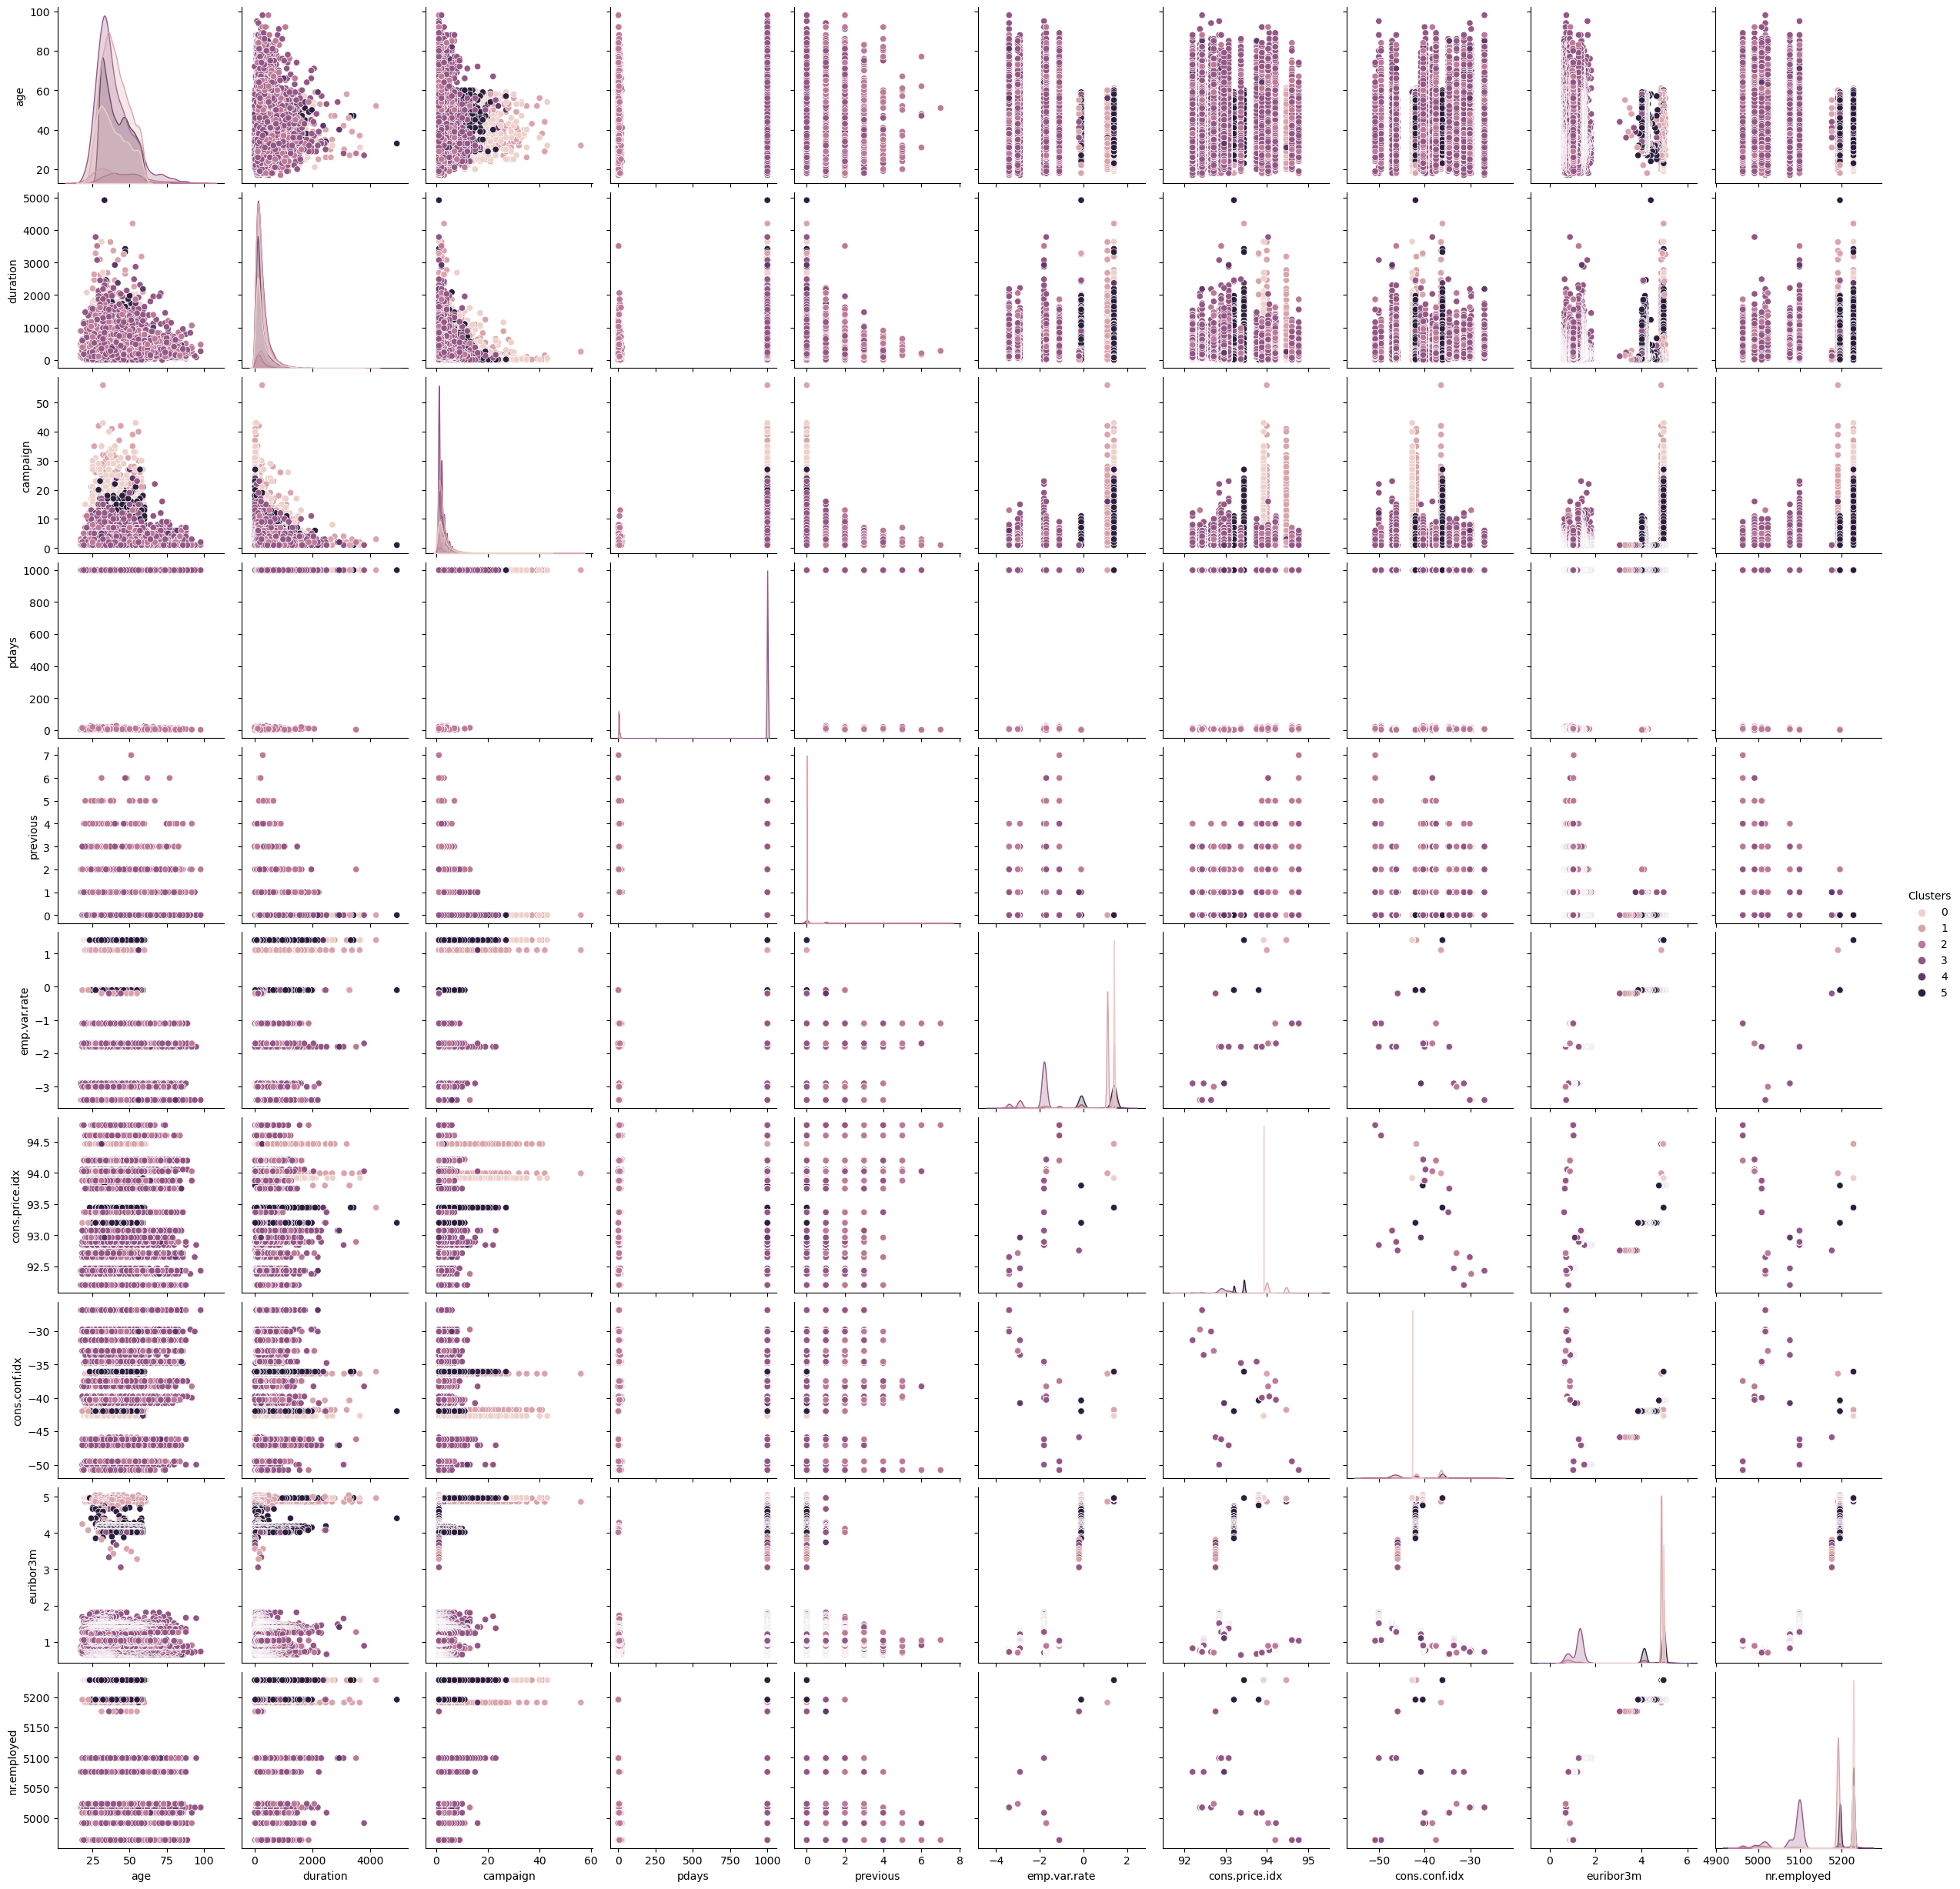

In [46]:
df_copy = df.copy()
df_copy['Clusters'] = preds
plt.figure(figsize=(12,6),dpi=200)
sns.pairplot(df_copy, hue='Clusters')

## K-mean for image classification

In [47]:
import matplotlib.image as mpimg

In [49]:
image_as_array = mpimg.imread('DATA/palm_trees.jpg')
print(image_as_array) # RGB CODES FOR EACH PIXEL

[[[ 25  89 127]
  [ 25  89 127]
  [ 25  89 127]
  ...
  [ 23  63  99]
  [ 51  91 127]
  [ 50  90 126]]

 [[ 25  89 127]
  [ 25  89 127]
  [ 25  89 127]
  ...
  [ 31  71 107]
  [ 48  88 124]
  [ 47  90 125]]

 [[ 25  89 127]
  [ 25  89 127]
  [ 25  89 127]
  ...
  [ 39  79 115]
  [ 42  85 120]
  [ 44  88 123]]

 ...

 [[  4   4   6]
  [  4   4   6]
  [  4   4   6]
  ...
  [  9   9  11]
  [  9   9  11]
  [  9   9  11]]

 [[  3   3   5]
  [  3   3   5]
  [  3   3   5]
  ...
  [  8   8  10]
  [  8   8  10]
  [  8   8  10]]

 [[  4   4   6]
  [  4   4   6]
  [  4   4   6]
  ...
  [  9   9  11]
  [ 10  10  12]
  [ 10  10  12]]]


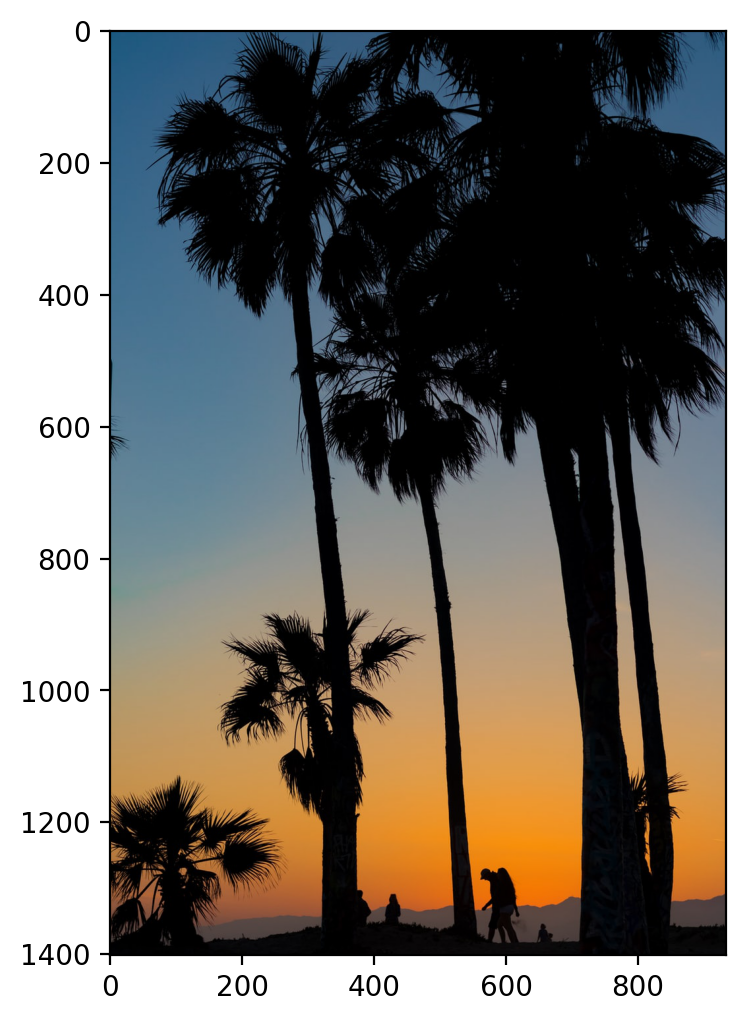

In [50]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

In [51]:
print(image_as_array.shape)
# (h,w,3 color channels)

(1401, 934, 3)


In [52]:
# Convert from 3d to 2d
(h,w,c) = image_as_array.shape
image_as_array2d = image_as_array.reshape(h*w,c)

# Using Kmeans to Quantize Colors
# Quantizing colors means we'll reduce the number of unique colors here to K unique colors. 
model = KMeans(n_clusters=6)
print(model)

KMeans(n_clusters=6)


In [53]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [56]:
labels = model.fit_predict(image_as_array2d)
labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, ..., 0, 0, 0])

In [57]:
# THESE ARE THE 6 RGB COLOR CODES!
print('cluster_centers_: ', model.cluster_centers_)

cluster_centers_:  [[  2.76282653   2.58081203   3.70528088]
 [194.06168662 154.55337595 106.74860611]
 [ 71.98478769 109.93640113 138.06262644]
 [219.29531175 134.50296351  45.2950964 ]
 [ 67.27441824  61.70262528  62.28035684]
 [139.52512415 144.62198121 143.1498363 ]]


In [58]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
print('rgb_codes: ', rgb_codes)

rgb_codes:  [[  3   3   4]
 [194 155 107]
 [ 72 110 138]
 [219 135  45]
 [ 67  62  62]
 [140 145 143]]


In [59]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))
print('quantized_image: ', quantized_image)

quantized_image:  [[[ 72 110 138]
  [ 72 110 138]
  [ 72 110 138]
  ...
  [ 67  62  62]
  [ 72 110 138]
  [ 72 110 138]]

 [[ 72 110 138]
  [ 72 110 138]
  [ 72 110 138]
  ...
  [ 67  62  62]
  [ 72 110 138]
  [ 72 110 138]]

 [[ 72 110 138]
  [ 72 110 138]
  [ 72 110 138]
  ...
  [ 72 110 138]
  [ 72 110 138]
  [ 72 110 138]]

 ...

 [[  3   3   4]
  [  3   3   4]
  [  3   3   4]
  ...
  [  3   3   4]
  [  3   3   4]
  [  3   3   4]]

 [[  3   3   4]
  [  3   3   4]
  [  3   3   4]
  ...
  [  3   3   4]
  [  3   3   4]
  [  3   3   4]]

 [[  3   3   4]
  [  3   3   4]
  [  3   3   4]
  ...
  [  3   3   4]
  [  3   3   4]
  [  3   3   4]]]


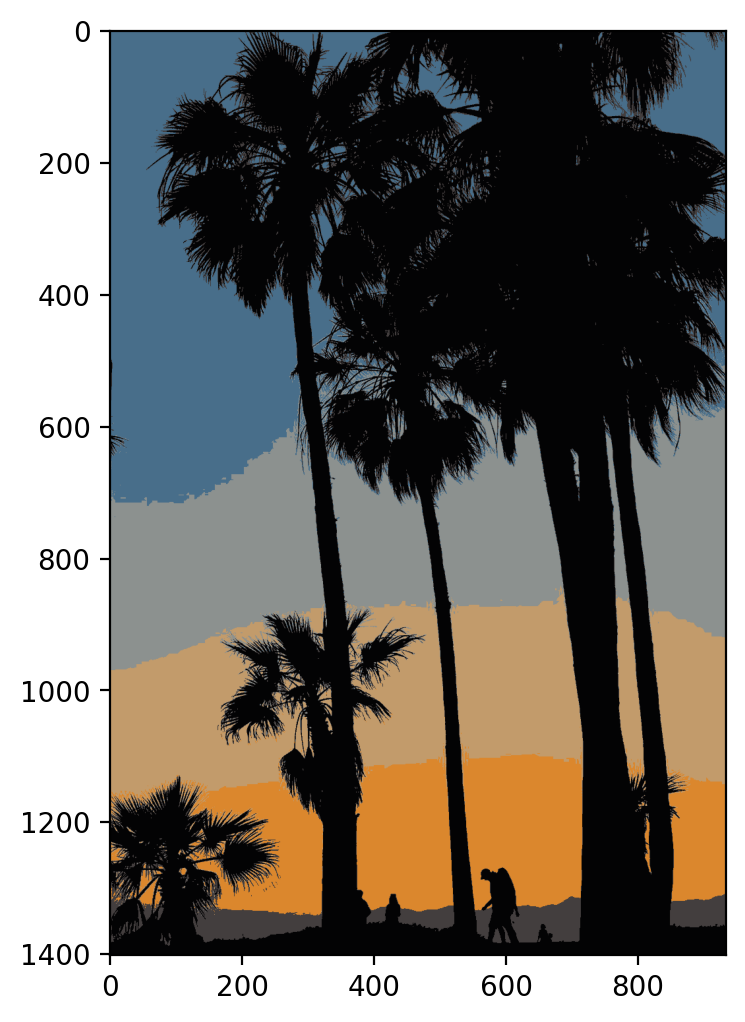

In [60]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)

# Agglomerative Clustering

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [72]:
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(scaled_df)
print(cluster_labels)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 3 2 2 2 2 2 0 1 1 1 1 3 0 3 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 3 3 2 0 3 0 2 0 0 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 2 2 2 2 0 3 3 0 3 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 1 1 1 1 0 3 0 3 3
 0 0 2 1 1 2 2 2 2 1 2 3 1 0 0 0 3 0 3 0 0 0 0 1 1 1 1 1 2 2 2 3 3 0 2 2 3
 3 2 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 3 0 0 0 3 2 3 0 2 0 2 2 2 2 3 2 2 0 0 2
 0 1 0 1 0 0 0 0 0 0 2 3 0 0 0 0 2 3 3 0 2 1 2 3 2 1 1 1 1 3 0 2 0 3 1 0 1
 1 0 0 0 0 1 1 1 1 2 0 3 0 0 0 3 2 3 2 3 2 0 3 3 3 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 3 3 0 3 0 0 3 2 2 2 2 2 3 0 0 0 0 0 1 1 1 1 1 1 1 1 2 3 0 0 2
 0 2 0 0 0 3 2 0 0 0 0 2 3 0 3 0 0 0 0 2 3 3 3 3 3 0 3 2 2 2 2 3 3 2 3 3 2
 3 0 0 0 0 0 3 0 3 3 3 3 3 0 0 0 2 3 3 3 3 2 2 3 3 0 0 0 0 0 0 0 0 0 0 0 2
 3 3 0 0 3 3 3 3 3 3 0 0 0 0 3 0 0 0 2 0 0 0]


<Axes: xlabel='mpg', ylabel='weight'>

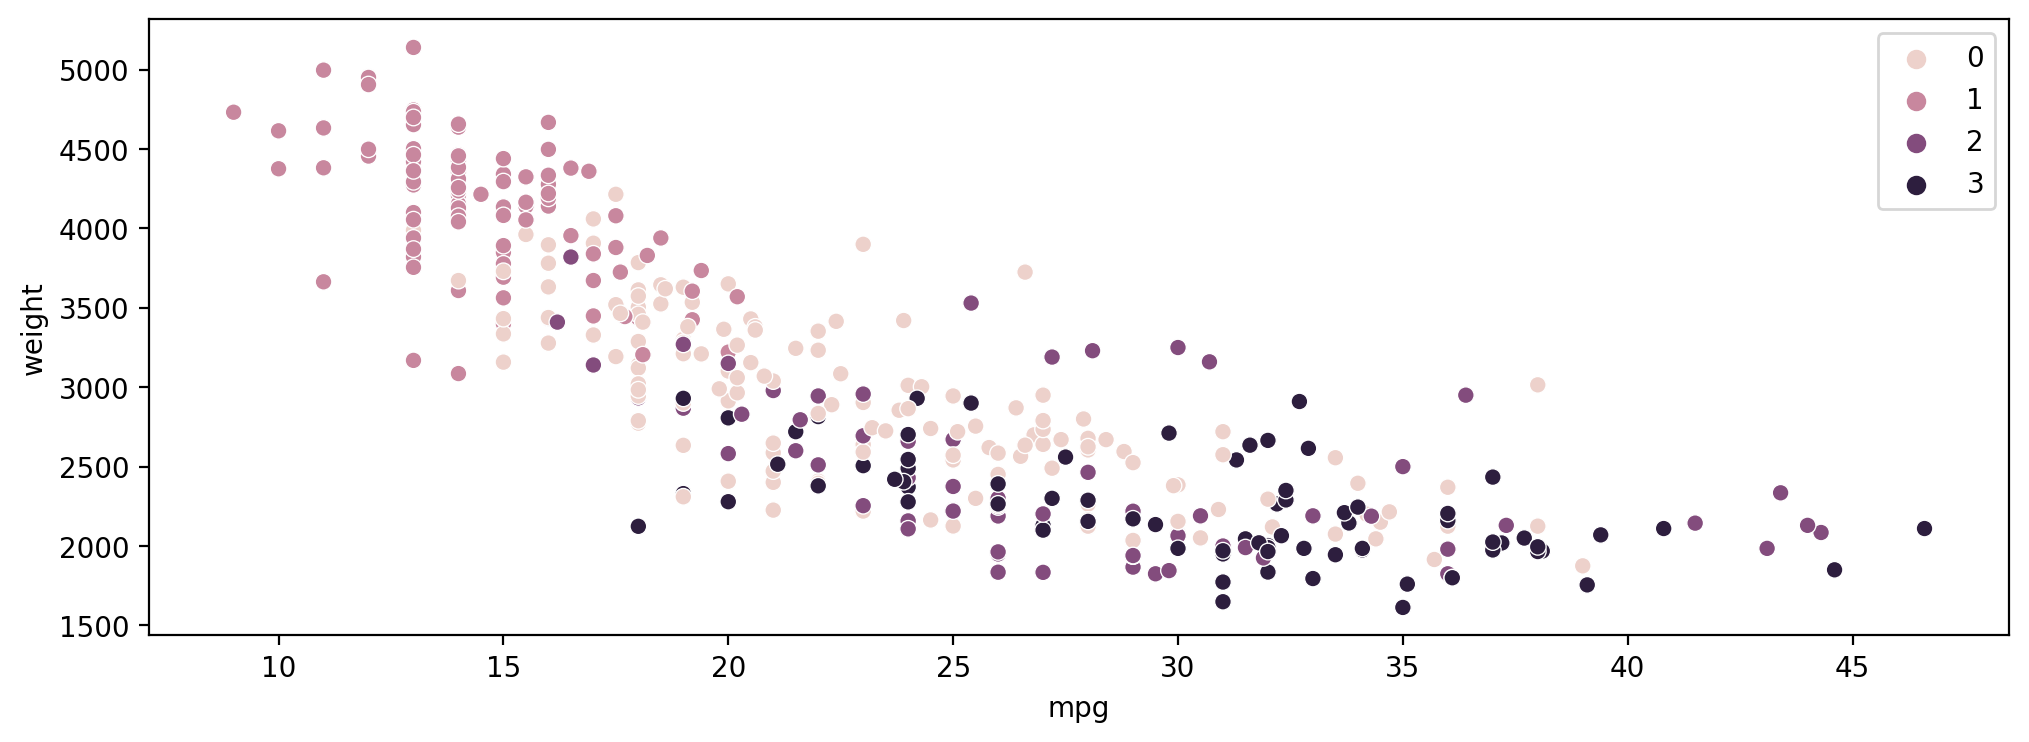

In [73]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels)

In [74]:
# Exploring Number of Clusters with Dendrograms
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
cluster_labels = model.fit_predict(scaled_df)
print(cluster_labels)

[325 363 281 232 268 321 306 305 322 343 225 209 299 301 221 353 351 356
 391 373 342 341 349 277 366 241 389 311 307 308 234 331 220 196 371 285
 330 390 227 388 386 283 310 295 332 329 352 264 354 333 231 263 358 253
 222 275 260 202 365 379 296 359 182 170 368 246 238 300 347 293 267 346
 215 374 279 259 206 261 289 345 294 380 195 237 214 340 304 382 249 239
 316 370 282 271 245 290 360 339 194 211 189 216 338 381 276 201 372 207
 228 357 385 350 219 197 129 229 165 377 369 233 326 375 176 235 203 230
 186 323 376 337 344 317 190 204 286 226 247 217 303 114 378 256 314 335
 172 199 208 153 315 291 137 255 248 169 140 272 269 188 309 257 280 151
 171 118 152 387 154 336 284 364 142 324 164 185 355 254 312 109 168 362
 288 123 252 334 131 175 113 318 174  92 348 181 167  76 292 327 162 147
 302 145 184 274 146 266 177 278 141 166 250 367 103 187 223 198 218 287
 157 173 144  86 112 273 122  93 319 240 138 127  84  75 212 108 149 150
 242 192  97 178  85 265 251 328 236 119  83 158 31

linkage_matrix:  [[  3.           5.           1.41421356   2.        ]
 [166.         220.           1.41421356   2.        ]
 [122.         169.           1.41421356   2.        ]
 ...
 [322.         777.          63.5688603  389.        ]
 [319.         778.          67.11929678 390.        ]
 [273.         779.          67.17886572 391.        ]]


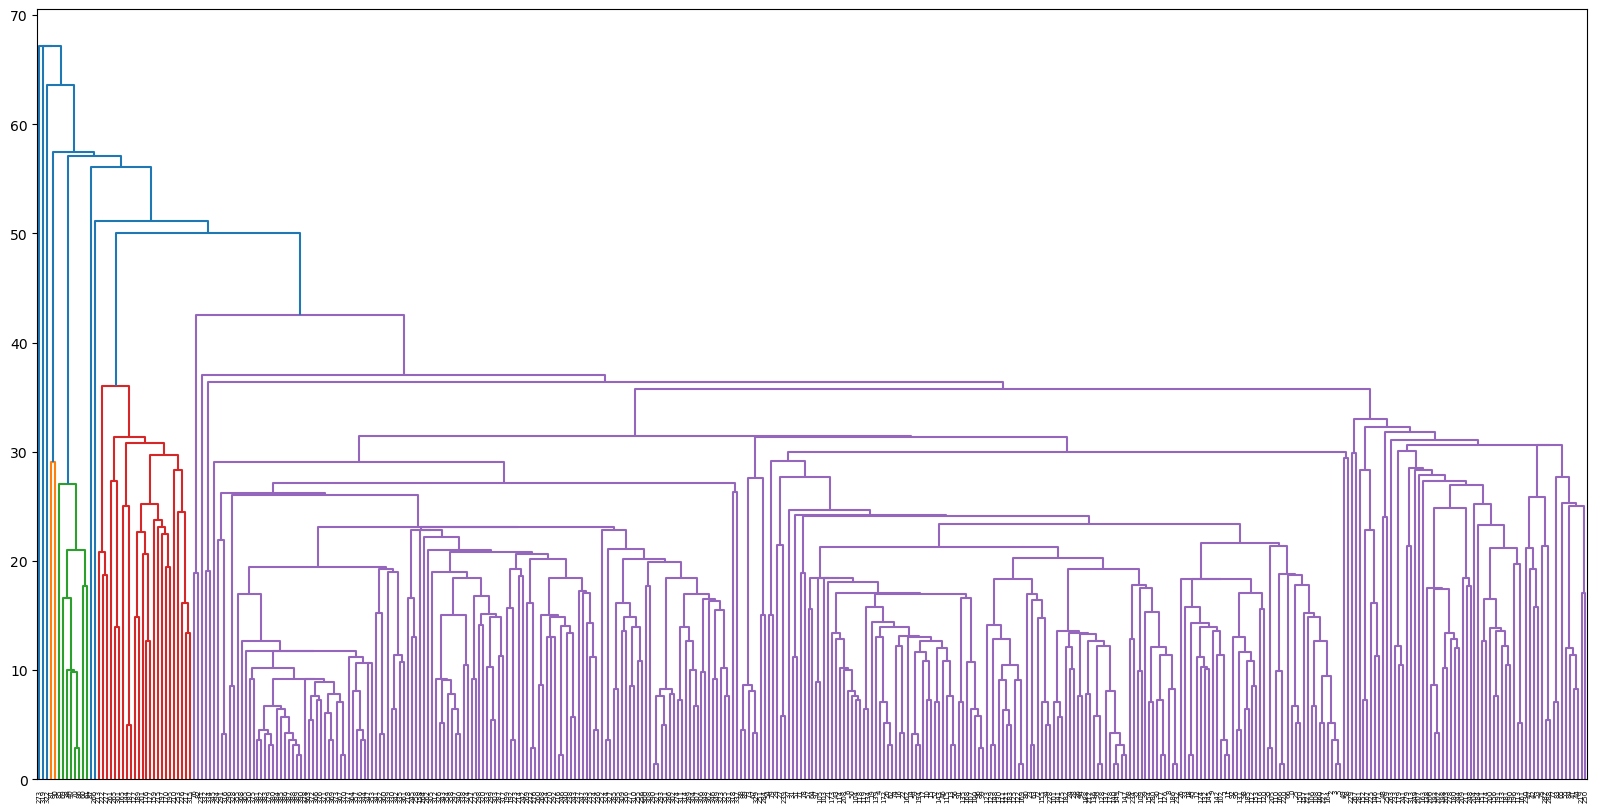

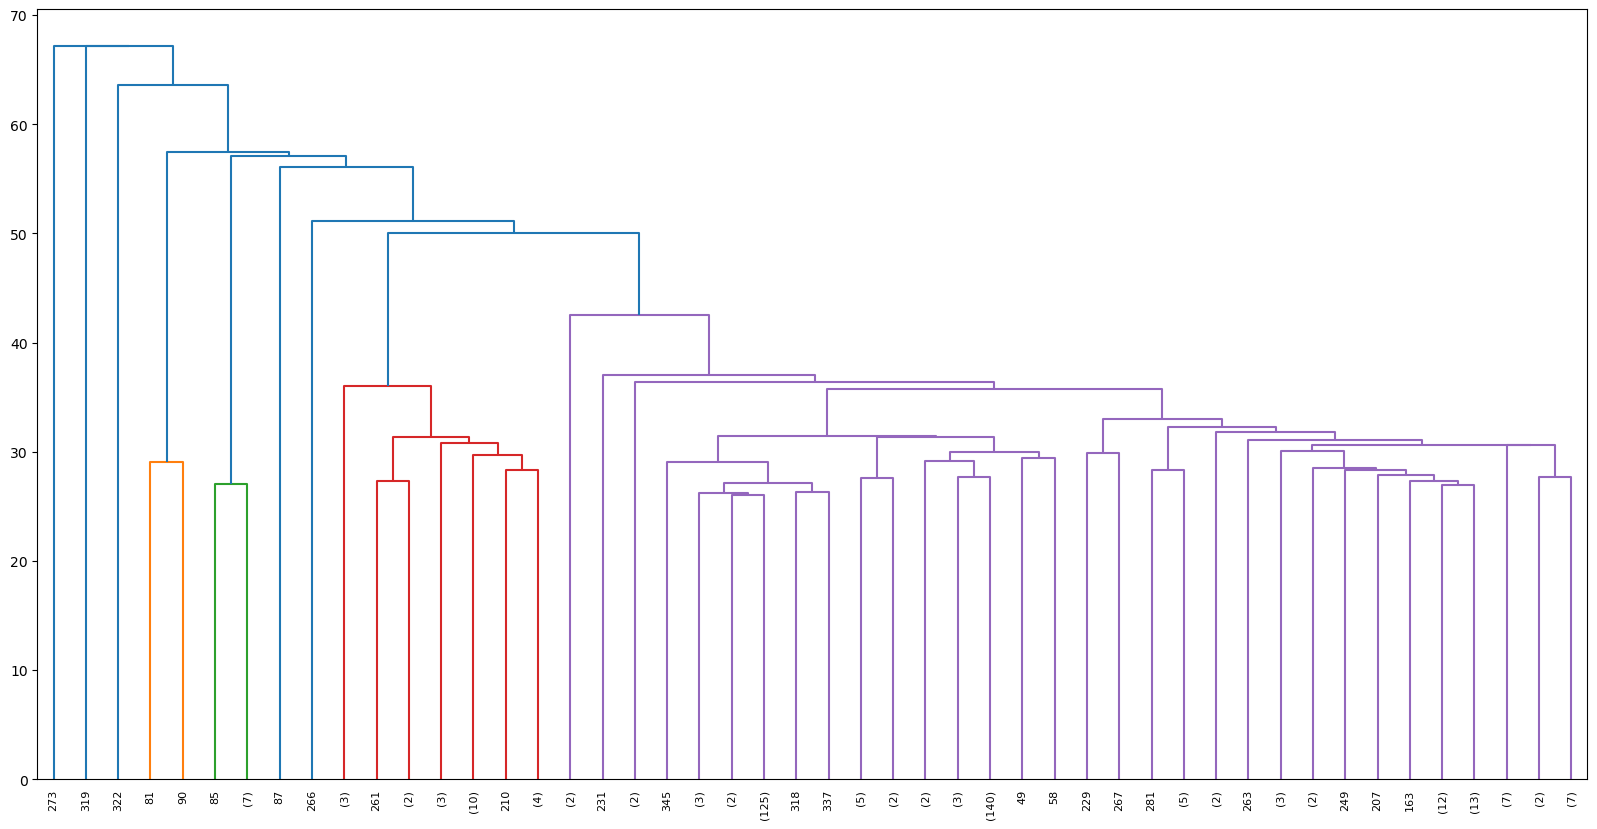

In [75]:
linkage_matrix = hierarchy.linkage(model.children_)
print('linkage_matrix: ', linkage_matrix)
plt.figure(figsize=(20,10))
# Warning! This plot will take awhile!!
dn = hierarchy.dendrogram(linkage_matrix)

plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

In [78]:
# Choosing a Threshold Distance
# What is the distance between two points?
print('idxmax: ', scaled_df['mpg'].idxmax())
print('idxmin: ',scaled_df['mpg'].idxmin())
scaled_df.describe()

idxmax:  320
idxmin:  28


mpg     cylinders  displacement    horsepower        weight  \
count  3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02   
mean   1.450087e-16 -1.087565e-16 -7.250436e-17 -1.812609e-16 -1.812609e-17   
std    1.001278e+00  1.001278e+00  1.001278e+00  1.001278e+00  1.001278e+00   
min   -1.853218e+00 -1.451004e+00 -1.209563e+00 -1.520975e+00 -1.608575e+00   
25%   -8.269250e-01 -8.640136e-01 -8.555316e-01 -7.665929e-01 -8.868535e-01   
50%   -8.927701e-02 -8.640136e-01 -4.153842e-01 -2.853488e-01 -2.052109e-01   
75%    7.125143e-01  1.483947e+00  7.782764e-01  5.600800e-01  7.510927e-01   
max    2.970359e+00  1.483947e+00  2.493416e+00  3.265452e+00  2.549061e+00   

       acceleration    model_year  origin_europe  origin_japan    origin_usa  \
count  3.920000e+02  3.920000e+02     392.000000  3.920000e+02  3.920000e+02   
mean   4.350262e-16 -1.160070e-15       0.000000  1.812609e-17  4.531523e-17   
std    1.001278e+00  1.001278e+00       1.001278  1.001278e+00  1.001278e+00   
min   -2.736983e+00 -1.625315e+00      -0.458123 -5.023905e-01 -1.290994e+00   
25%   -6.410551e-01 -8.098841e-01      -0.458123 -5.023905e-01 -1.290994e+00   
50%   -1.499869e-02  5.547151e-03      -0.458123 -5.023905e-01  7.745967e-01   
75%    5.384714e-01  8.209784e-01      -0.458123 -5.023905e-01  7.745967e-01   
max    3.360262e+00  1.636410e+00       2.182821  1.990484e+00  7.745967e-01   

       ...  name_volvo 145e (sw)  name_volvo 244dl  name_volvo 245  \
count  ...          3.920000e+02      3.920000e+02    3.920000e+02   
mean   ...         -9.063045e-18     -9.063045e-18    1.812609e-17   
std    ...          1.001278e+00      1.001278e+00    1.001278e+00   
min    ...         -5.057217e-02     -5.057217e-02   -5.057217e-02   
25%    ...         -5.057217e-02     -5.057217e-02   -5.057217e-02   
50%    ...         -5.057217e-02     -5.057217e-02   -5.057217e-02   
75%    ...         -5.057217e-02     -5.057217e-02   -5.057217e-02   
max    ...          1.977372e+01      1.977372e+01    1.977372e+01   

       name_volvo 264gl  name_volvo diesel  name_vw dasher (diesel)  \
count      3.920000e+02         392.000000               392.000000   
mean      -9.063045e-18           0.000000                 0.000000   
std        1.001278e+00           1.001278                 1.001278   
min       -5.057217e-02          -0.050572                -0.050572   
25%       -5.057217e-02          -0.050572                -0.050572   
50%       -5.057217e-02          -0.050572                -0.050572   
75%       -5.057217e-02          -0.050572                -0.050572   
max        1.977372e+01          19.773720                19.773720   

       name_vw pickup  name_vw rabbit  name_vw rabbit c (diesel)  \
count    3.920000e+02    3.920000e+02                 392.000000   
mean    -9.063045e-18   -2.718914e-17                   0.000000   
std      1.001278e+00    1.001278e+00                   1.001278   
min     -5.057217e-02   -7.161149e-02                  -0.050572   
25%     -5.057217e-02   -7.161149e-02                  -0.050572   
50%     -5.057217e-02   -7.161149e-02                  -0.050572   
75%     -5.057217e-02   -7.161149e-02                  -0.050572   
max      1.977372e+01    1.396424e+01                  19.773720   

       name_vw rabbit custom  
count           3.920000e+02  
mean            1.359457e-17  
std             1.001278e+00  
min            -5.057217e-02  
25%            -5.057217e-02  
50%            -5.057217e-02  
75%            -5.057217e-02  
max             1.977372e+01  

[8 rows x 311 columns]

In [81]:
a = scaled_df.iloc[320]
b = scaled_df.iloc[28]
dist = np.linalg.norm(a-b)

print('dist: ', dist)
# Max possible distance?
print('max dist: ', np.sqrt(len(scaled_df.columns)))

dist:  29.28638872770585
max dist:  17.635192088548397


linkage_matrix:  [[  3.           5.           1.41421356   2.        ]
 [166.         220.           1.41421356   2.        ]
 [122.         169.           1.41421356   2.        ]
 ...
 [322.         777.          63.5688603  389.        ]
 [319.         778.          67.11929678 390.        ]
 [273.         779.          67.17886572 391.        ]]


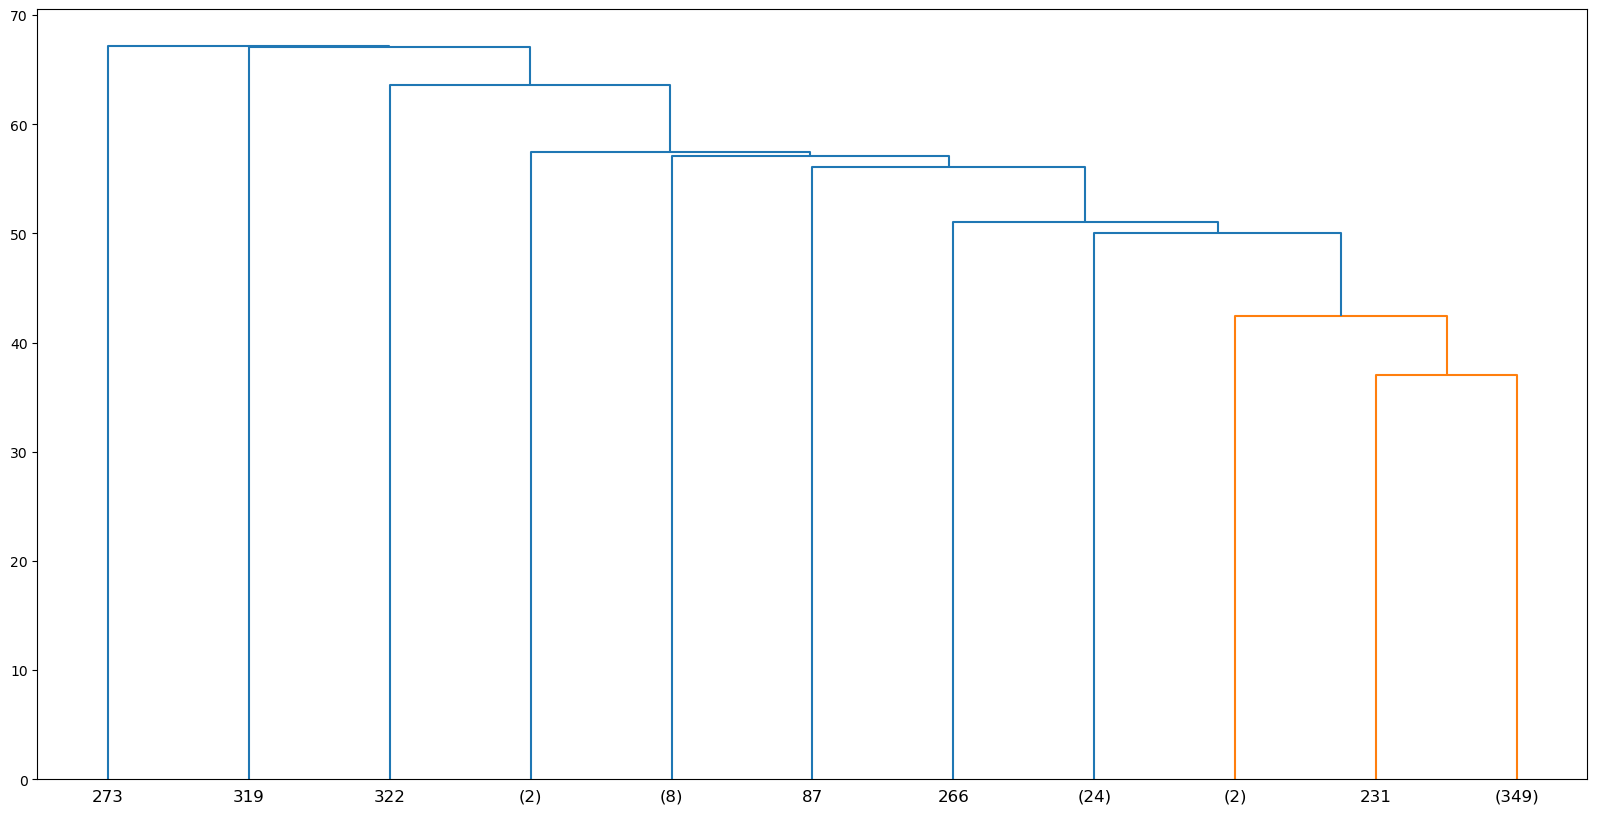

In [82]:
# Linkage Matrix

# A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.
linkage_matrix = hierarchy.linkage(model.children_)

# show two clusters that lined together, distance metrics between them and number of points that connected under that clusters
print('linkage_matrix: ', linkage_matrix)

plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=11)

plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [83]:
# does not usually using for image clustering
from sklearn.cluster import DBSCAN

outlier_percent:  [0.0, 94.38775510204081, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


Text(0.5, 0, 'Minimum Number of Samples')

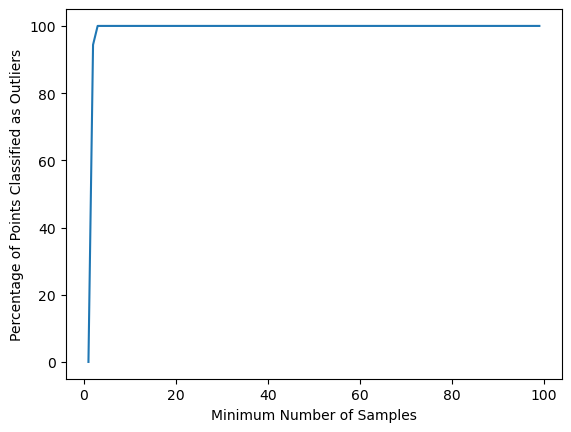

In [90]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    model = DBSCAN(min_samples=n)
    model.fit(scaled_df)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    
    outlier_percent.append(perc_outliers)

print('outlier_percent: ', outlier_percent)
plt.figure()
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

In [104]:
image_as_array2d.shape
# quantized_image = np.reshape(image_as_array2d, (h, w, c))
# quantized_image
# plt.figure(figsize=(6,6),dpi=200)
# plt.imshow(quantized_image)

(1308534, 3)